### Classification and Prediction of Peri-Diagnostic Prognoses in Parkinson’s Patients using Machine Learning on Multi-modal Clinical and Genetic Data

Faraz Faghri | Sep 07, 2016 

### Goal: 
1. At baseline, determine what are factors that predict clinical progression?
2. What are the sub-types of Parkinson’s disease based on clinical, molecular and imaging data?

### Summary of results:
1. We have identified 3 PD progression sub-types: low, mid, and high which progress at varying rates and also differ at baseline compared to healthy aging
2. We predict PD progression from baseline with 80-98% accuracy by PD subtype
3. We have identified statistically significant elements at baseline which predicts progression: MoCA delayed recall, UPDR3 rigidity, Sleep movement, etc.
4. We have improved the predictions of progression significantly by incorporating various machine learning, approaches as PD is such a heterogenous disease


### Description of Methods Used:
1. We used Gaussian Mixture Models as unsupervised machine learning for identifying PD prognosis subtypes differing at baseline and how they progress
2. Logistic regression as supervised classifier for predicting subtypes and their clinical progression from baseline
3. Randomized decision trees (a.k.a. extra-trees) for identifying important factors at baseline in prediction of clinical progression

## 1. Data load and cleansing

In [1]:
# loading libraries and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
biospecimen1 = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv")

In [3]:
cols = {} # column names
# Biospecimen Analysis
cols["biospecimen"] = ["PATNO", "CLINICAL_EVENT","TYPE", "TESTNAME", "TESTVALUE", "UNITS"]
# Medical
cols["pd_features"] = ["PATNO", "SXMO","SXYEAR", "PDDXDT"] # first symptom onset month, year, diagnosis date 
cols["pd_medication"] = ["PATNO", "EVENT_ID","PDMEDYN","ONLDOPA", "ONDOPAG", "ONOTHER"] # on medication, Levodopa, Dopamine Agonist, other
cols["vital_sign"] = ["PATNO", "EVENT_ID","WGTKG","HTCM"]
# Medical-Neurological Exam
cols["neuro_cranial"] = ["PATNO", "EVENT_ID","CN1RSP", "CN2RSP", "CN346RSP", "CN5RSP", "CN7RSP", "CN8RSP", "CN910RSP", "CN11RSP", "CN12RSP"]
# Medical-Safety Monitoring

# Motor Assessments
cols["updrs1"] = ["PATNO", "EVENT_ID", "INFODT", "NP1COG", "NP1HALL", "NP1DPRS", "NP1ANXS", "NP1APAT", "NP1DDS"]
cols["updrs1pq"] = ["PATNO", "EVENT_ID", "NP1SLPN", "NP1SLPD", "NP1PAIN", "NP1URIN", "NP1CNST", "NP1LTHD", "NP1FATG"]
cols["updrs2pq"] = ["PATNO", "EVENT_ID", "NP2SPCH", "NP2SALV", "NP2SWAL", "NP2EAT", "NP2DRES", "NP2HYGN", "NP2HWRT", "NP2HOBB", "NP2TURN", "NP2TRMR", "NP2RISE", "NP2WALK", "NP2FREZ"]
cols["updrs3_temp"] = ["PATNO", "EVENT_ID", "PAG_NAME", "CMEDTM", "EXAMTM", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON", "DYSKPRES", "DYSKIRAT", "NHY", "ANNUAL_TIME_BTW_DOSE_NUPDRS", "ON_OFF_DOSE", "PD_MED_USE"]
cols["updrs3"] = ["PATNO", "EVENT_ID", "NP3SPCH", "NP3FACXP", "NP3RIGN", "NP3RIGRU", "NP3RIGLU", "PN3RIGRL", "NP3RIGLL", "NP3FTAPR", "NP3FTAPL", "NP3HMOVR", "NP3HMOVL", "NP3PRSPR", "NP3PRSPL", "NP3TTAPR", "NP3TTAPL", "NP3LGAGR", "NP3LGAGL", "NP3RISNG", "NP3GAIT", "NP3FRZGT", "NP3PSTBL", "NP3POSTR", "NP3BRADY", "NP3PTRMR", "NP3PTRML", "NP3KTRMR", "NP3KTRML", "NP3RTARU", "NP3RTALU", "NP3RTARL", "NP3RTALL", "NP3RTALJ", "NP3RTCON"]
cols["updrs4"] = ["PATNO", "EVENT_ID", "NP4WDYSK", "NP4DYSKI", "NP4OFF", "NP4FLCTI", "NP4FLCTX", "NP4DYSTN"]
cols["schwab"] = ["PATNO", "EVENT_ID", "MSEADLG"]
cols["pase_house"] = ["PATNO", "EVENT_ID", "LTHSWRK", "HVYHSWRK", "HMREPR", "LAWNWRK", "OUTGARDN", "CAREGVR", "WRKVL", "WRKVLHR", "WRKVLACT"]
# Non-motor Assessments
cols["benton"] = ["PATNO", "EVENT_ID", "JLO_TOTRAW"]
cols["cog_catg"] = ["PATNO", "EVENT_ID", "COGDECLN", "FNCDTCOG", "COGSTATE"]
cols["epworth"] = ["PATNO", "EVENT_ID", "ESS1", "ESS2", "ESS3", "ESS4", "ESS5", "ESS6", "ESS7", "ESS8"]
cols["geriatric"] = ["PATNO", "EVENT_ID", "GDSSATIS", "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSGSPIR", "GDSAFRAD", "GDSHAPPY", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSALIVE", "GDSWRTLS", "GDSENRGY", "GDSHOPLS", "GDSBETER"]
cols["geriatric_pos"] = [ "GDSDROPD", "GDSEMPTY", "GDSBORED", "GDSAFRAD", "GDSHLPLS", "GDSHOME", "GDSMEMRY", "GDSWRTLS", "GDSHOPLS", "GDSBETER"]
cols["geriatric_neg"] = [ "GDSSATIS", "GDSGSPIR", "GDSHAPPY", "GDSALIVE", "GDSENRGY"]
cols["hopkins_verbal"] = ["PATNO", "EVENT_ID", "HVLTRT1", "HVLTRT2", "HVLTRT3", "HVLTRDLY", "HVLTREC", "HVLTFPRL", "HVLTFPUN"]
cols["letter_seq"] = ["PATNO", "EVENT_ID","LNS_TOTRAW"]
cols["moca"] = ["PATNO", "EVENT_ID", "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH", "MCALION", "MCARHINO", "MCACAMEL", "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7", "MCASNTNC", "MCAVFNUM", "MCAVF", "MCAABSTR", "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5", "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY", "MCATOT"]
cols["moca_visuospatial"] = [ "MCAALTTM", "MCACUBE", "MCACLCKC", "MCACLCKN", "MCACLCKH"]
cols["moca_naming"] = [ "MCALION", "MCARHINO", "MCACAMEL"]
cols["moca_attention"] = [ "MCAFDS", "MCABDS", "MCAVIGIL", "MCASER7"]
cols["moca_language"] = [ "MCASNTNC", "MCAVF"]
cols["moca_delayed_recall"] = [ "MCAREC1", "MCAREC2", "MCAREC3", "MCAREC4", "MCAREC5"]
cols["moca_orientation"] = [ "MCADATE", "MCAMONTH", "MCAYR", "MCADAY", "MCAPLACE", "MCACITY"]
cols["upsit"] = [ "SUBJECT_ID", "SCENT_10_RESPONSE", "SCENT_09_RESPONSE", "SCENT_08_RESPONSE", "SCENT_07_RESPONSE", "SCENT_06_RESPONSE", "SCENT_05_RESPONSE", "SCENT_04_RESPONSE", "SCENT_03_RESPONSE", "SCENT_02_RESPONSE", "SCENT_01_RESPONSE", "SCENT_20_RESPONSE", "SCENT_19_RESPONSE", "SCENT_18_RESPONSE", "SCENT_17_RESPONSE", "SCENT_16_RESPONSE", "SCENT_15_RESPONSE", "SCENT_14_RESPONSE", "SCENT_13_RESPONSE", "SCENT_12_RESPONSE", "SCENT_11_RESPONSE", "SCENT_30_RESPONSE", "SCENT_29_RESPONSE", "SCENT_28_RESPONSE", "SCENT_27_RESPONSE", "SCENT_26_RESPONSE", "SCENT_25_RESPONSE", "SCENT_24_RESPONSE", "SCENT_23_RESPONSE", "SCENT_22_RESPONSE", "SCENT_21_RESPONSE", "SCENT_40_RESPONSE", "SCENT_39_RESPONSE", "SCENT_38_RESPONSE", "SCENT_37_RESPONSE", "SCENT_36_RESPONSE", "SCENT_35_RESPONSE", "SCENT_34_RESPONSE", "SCENT_33_RESPONSE", "SCENT_32_RESPONSE", "SCENT_31_RESPONSE", "SCENT_10_CORRECT", "SCENT_09_CORRECT", "SCENT_08_CORRECT", "SCENT_07_CORRECT", "SCENT_06_CORRECT", "SCENT_05_CORRECT", "SCENT_04_CORRECT", "SCENT_03_CORRECT", "SCENT_02_CORRECT", "SCENT_01_CORRECT", "SCENT_20_CORRECT", "SCENT_19_CORRECT", "SCENT_18_CORRECT", "SCENT_17_CORRECT", "SCENT_16_CORRECT", "SCENT_15_CORRECT", "SCENT_14_CORRECT", "SCENT_13_CORRECT", "SCENT_12_CORRECT", "SCENT_11_CORRECT", "SCENT_30_CORRECT", "SCENT_29_CORRECT", "SCENT_28_CORRECT", "SCENT_27_CORRECT", "SCENT_26_CORRECT", "SCENT_25_CORRECT", "SCENT_24_CORRECT", "SCENT_23_CORRECT", "SCENT_22_CORRECT", "SCENT_21_CORRECT", "SCENT_40_CORRECT", "SCENT_39_CORRECT", "SCENT_38_CORRECT", "SCENT_37_CORRECT", "SCENT_36_CORRECT", "SCENT_35_CORRECT", "SCENT_34_CORRECT", "SCENT_33_CORRECT", "SCENT_32_CORRECT", "SCENT_31_CORRECT", "TOTAL_CORRECT"]
cols["quip"] = [ "PATNO", "EVENT_ID", "TMGAMBLE", "CNTRLGMB", "TMSEX", "CNTRLSEX", "TMBUY", "CNTRLBUY", "TMEAT", "CNTRLEAT", "TMTORACT", "TMTMTACT", "TMTRWD" ]
cols["rem"] = [ "PATNO", "EVENT_ID", "DRMVIVID", "DRMAGRAC", "DRMNOCTB", "SLPLMBMV", "SLPINJUR", "DRMVERBL", "DRMFIGHT", "DRMUMV", "DRMOBJFL", "MVAWAKEN", "DRMREMEM", "SLPDSTRB", "STROKE", "HETRA", "RLS", "NARCLPSY", "DEPRS", "EPILEPSY", "BRNINFM" ]
cols["aut"] = [ "PATNO", "EVENT_ID", "SCAU1", "SCAU2", "SCAU3", "SCAU4", "SCAU5", "SCAU6", "SCAU7", "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13", "SCAU14", "SCAU15", "SCAU16", "SCAU17", "SCAU18", "SCAU19", "SCAU20", "SCAU21", "SCAU22", "SCAU23", "SCAU23A", "SCAU23AT", "SCAU24", "SCAU25", "SCAU26A", "SCAU26AT", "SCAU26B", "SCAU26BT", "SCAU26C", "SCAU26CT", "SCAU26D", "SCAU26DT" ]
cols["aut_gastrointestinal_up"] = [ "SCAU1", "SCAU2", "SCAU3" ]
cols["aut_gastrointestinal_down"] = [ "SCAU4", "SCAU5", "SCAU6", "SCAU7" ]
cols["aut_urinary"] = [ "SCAU8", "SCAU9", "SCAU10", "SCAU11", "SCAU12", "SCAU13" ] 
cols["aut_cardiovascular"] = [  "SCAU14", "SCAU15", "SCAU16" ]
cols["aut_thermoregulatory"] = [ "SCAU17", "SCAU18" ]
cols["aut_pupillomotor"] = [ "SCAU19" ]
cols["aut_skin"] = [ "SCAU20", "SCAU21" ]
cols["aut_sexual"] = [ "SCAU22", "SCAU23", "SCAU24", "SCAU25"] # 9 for NA, might skew the results signific for M/F better to remove
cols["semantic"] = [ "PATNO", "EVENT_ID", "VLTANIM", "VLTVEG", "VLTFRUIT" ]
cols["stai"] = [ "PATNO", "EVENT_ID", "STAIAD1", "STAIAD2", "STAIAD3", "STAIAD4", "STAIAD5", "STAIAD6", "STAIAD7", "STAIAD8", "STAIAD9", "STAIAD10", "STAIAD11", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD15", "STAIAD16", "STAIAD17", "STAIAD18", "STAIAD19", "STAIAD20", "STAIAD21", "STAIAD22", "STAIAD23", "STAIAD24", "STAIAD25", "STAIAD26", "STAIAD27", "STAIAD28", "STAIAD29", "STAIAD30", "STAIAD31", "STAIAD32", "STAIAD33", "STAIAD34", "STAIAD35", "STAIAD36", "STAIAD37", "STAIAD38", "STAIAD39", "STAIAD40" ]
cols["stai_a_state_pos"] = ["STAIAD3", "STAIAD4", "STAIAD6", "STAIAD7", "STAIAD9", "STAIAD12", "STAIAD13", "STAIAD14", "STAIAD17", "STAIAD18"]
cols["stai_a_state_neg"] = ["STAIAD1", "STAIAD2", "STAIAD5",  "STAIAD8", "STAIAD10", "STAIAD11", "STAIAD15", "STAIAD16", "STAIAD19", "STAIAD20"]
cols["stai_a_trait_pos"] = ["STAIAD22", "STAIAD24", "STAIAD25", "STAIAD28", "STAIAD29", "STAIAD31", "STAIAD32", "STAIAD35", "STAIAD37", "STAIAD38", "STAIAD40"]
cols["stai_a_trait_neg"] = ["STAIAD21", "STAIAD23", "STAIAD26", "STAIAD27", "STAIAD30", "STAIAD33", "STAIAD34", "STAIAD36", "STAIAD39"]
cols["sdm"] = [ "PATNO", "EVENT_ID", "SDMTOTAL"] 
cols["upsit_booklet"] = [ "PATNO", "EVENT_ID", "UPSITBK1", "UPSITBK2", "UPSITBK3", "UPSITBK4" ]
# Subject Characteristics
cols["family_history"] = ["PATNO", "BIOMOM", "BIOMOMPD", "BIODAD", "BIODADPD", "FULSIB", "FULSIBPD", "HAFSIB", "HAFSIBPD", "MAGPAR", "MAGPARPD", "PAGPAR", "PAGPARPD", "MATAU", "MATAUPD", "PATAU", "PATAUPD", "KIDSNUM", "KIDSPD"]
cols["status"] = ["PATNO", "RECRUITMENT_CAT", "IMAGING_CAT", "ENROLL_DATE", "ENROLL_CAT"]
cols["screening"] = ["PATNO", "BIRTHDT", "GENDER", "APPRDX", "CURRENT_APPRDX", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", "RAWHITE", "RANOS"]
cols["socio"] = [ "PATNO", "EDUCYRS", "HANDED" ]
# Subject Enrollment
cols["primary_diag"] = [ "PATNO", "PRIMDIAG" ]


In [6]:
serum

,EVENT_ID,TESTNAME,TESTVALUE
PATNO,,,
3000,BL,Serum IGF-1,170.1
3001,BL,Serum IGF-1,211
3002,BL,Serum IGF-1,126.2
3003,BL,Serum IGF-1,142.8
3004,BL,Serum IGF-1,165.4
3006,BL,Serum IGF-1,164.7
3008,BL,Serum IGF-1,65.8
3009,BL,Serum IGF-1,166
3010,BL,Serum IGF-1,133


In [5]:
## loading data and selecting the necessary columns
## data load
# Biospecimen Analysis
biospecimen = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', 'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'], \
                            ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
csf = biospecimen[(biospecimen["TYPE"] == 'Cerebrospinal fluid') & ~(biospecimen["TESTVALUE"] == "below detection limit")][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
hemoglobin = csf[csf["TESTNAME"] == "CSF Hemoglobin"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
alpha_syn = csf[csf["TESTNAME"] == "CSF Alpha-synuclein"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
total_tau = csf[csf["TESTNAME"] == "Total tau"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
abeta_42 = csf[csf["TESTNAME"] == "Abeta 42"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
p_tau181p = csf[csf["TESTNAME"] == "p-Tau181P"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
dna = biospecimen[(biospecimen["TYPE"] == 'DNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
rna = biospecimen[(biospecimen["TYPE"] == 'RNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
plasma = biospecimen[(biospecimen["TYPE"] == 'Plasma')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum = biospecimen[(biospecimen.TYPE == 'Serum')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]

In [34]:

## loading data and selecting the necessary columns
## data load
# Biospecimen Analysis
biospecimen = pd.read_csv("~/health data/project 1/data/Biospecimen_Analysis_Results.csv", index_col=["PATNO"], usecols=cols["biospecimen"])
biospecimen["CLINICAL_EVENT"].replace(['Baseline Collection', 'Screening Visit', 'Visit 01', 'Visit 02', 'Visit 03', 'Visit 04', \
                                       'Visit 05', 'Visit 06', 'Visit 07', 'Visit 08', 'Visit 09', 'Visit 10', 'Visit 11'], \
                            ['BL', 'SC', 'V01', 'V02', 'V03', 'V04', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12'], inplace=True)
biospecimen.rename(columns={'CLINICAL_EVENT':'EVENT_ID'}, inplace=True)
csf = biospecimen[(biospecimen["TYPE"] == 'Cerebrospinal fluid') & ~(biospecimen["TESTVALUE"] == "below detection limit")][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
hemoglobin = csf[csf["TESTNAME"] == "CSF Hemoglobin"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
alpha_syn = csf[csf["TESTNAME"] == "CSF Alpha-synuclein"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
total_tau = csf[csf["TESTNAME"] == "Total tau"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
abeta_42 = csf[csf["TESTNAME"] == "Abeta 42"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
p_tau181p = csf[csf["TESTNAME"] == "p-Tau181P"].reset_index().drop_duplicates(["PATNO","EVENT_ID","TESTNAME"]).set_index(['PATNO', 'EVENT_ID'])
dna = biospecimen[(biospecimen["TYPE"] == 'DNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
rna = biospecimen[(biospecimen["TYPE"] == 'RNA')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
plasma = biospecimen[(biospecimen["TYPE"] == 'Plasma')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
serum = biospecimen[(biospecimen["TYPE"] == 'Serum')][["EVENT_ID", "TESTNAME", "TESTVALUE"]]
# Medical
pd_start = pd.read_csv("~/health data/project 1/data/PD_Features.csv", index_col=["PATNO"], usecols=cols["pd_features"])
pd_medication = pd.read_csv("~/health data/project 1/data/Use_of_PD_Medication.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["pd_medication"])
vital_signs = pd.read_csv("~/health data/project 1/data/Vital_Signs.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["vital_sign"])
# Medical-Neurological Exam
neuro_cranial = pd.read_csv("~/health data/project 1/data/Neurological_Exam_-_Cranial_Nerves.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["neuro_cranial"])
# Medical-Safety Monitoring

# Motor Assessments
updrs1 = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_I.csv", index_col=["PATNO", "EVENT_ID"], parse_dates=["INFODT"],\
                     usecols=cols["updrs1"])
updrs1pq = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_I__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"],\
                       usecols=cols["updrs1pq"])
updrs2pq = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_II__Patient_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"],\
                       usecols=cols["updrs2pq"])
updrs3_temp = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_III__Post_Dose_.csv", index_col=["PATNO", "EVENT_ID"], \
                          usecols=cols["updrs3_temp"])
updrs3 = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3'] # before dose
updrs3a = updrs3_temp[updrs3_temp.PAG_NAME == 'NUPDRS3A'] # after dose 
updrs4 = pd.read_csv("~/health data/project 1/data/MDS_UPDRS_Part_IV.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["updrs4"])
schwab = pd.read_csv("~/health data/project 1/data/Modified_Schwab_+_England_ADL.csv", index_col=["PATNO", "EVENT_ID"], \
                     usecols=cols["schwab"])
pase_house = pd.read_csv("~/health data/project 1/data/PASE_-_Household_Activity.csv", index_col=["PATNO", "EVENT_ID"], \
                         usecols=cols["pase_house"])
# Non-motor Assessments
benton = pd.read_csv("~/health data/project 1/data/Benton_Judgment_of_Line_Orientation.csv", index_col=["PATNO", "EVENT_ID"], \
                     usecols=cols["benton"])
cog_catg = pd.read_csv("~/health data/project 1/data/Cognitive_Categorization.csv", index_col=["PATNO", "EVENT_ID"], \
                       usecols=cols["cog_catg"])
epworth = pd.read_csv("~/health data/project 1/data/Epworth_Sleepiness_Scale.csv", index_col=["PATNO", "EVENT_ID"], \
                      usecols=cols["epworth"])
geriatric = pd.read_csv("~/health data/project 1/data/Geriatric_Depression_Scale__Short_.csv", index_col=["PATNO", "EVENT_ID"], \
                        usecols=cols["geriatric"])
geriatric["total_pos"] = geriatric[cols["geriatric_pos"]].sum(axis=1)
geriatric["total_neg"] = geriatric[cols["geriatric_neg"]].sum(axis=1)
geriatric["total"] = geriatric["total_pos"] + 5 - geriatric["total_neg"]
geriatric = geriatric["total"] # drop the rest
hopkins_verbal = pd.read_csv("~/health data/project 1/data/Hopkins_Verbal_Learning_Test.csv", index_col=["PATNO", "EVENT_ID"],\
                             usecols=cols["hopkins_verbal"])
letter_seq = pd.read_csv("~/health data/project 1/data/Letter_-_Number_Sequencing__PD_.csv", index_col=["PATNO", "EVENT_ID"],\
                         usecols=cols["letter_seq"])
moca = pd.read_csv("~/health data/project 1/data/Montreal_Cognitive_Assessment__MoCA_.csv", index_col=["PATNO", "EVENT_ID"], \
                   usecols=cols["moca"])
moca["visuospatial"] = moca[cols["moca_visuospatial"]].sum(axis=1)
moca["naming"] = moca[cols["moca_naming"]].sum(axis=1)
moca["attention"] = moca[cols["moca_attention"]].sum(axis=1)
moca["language"] = moca[cols["moca_language"]].sum(axis=1)
moca["delayed_recall"] = moca[cols["moca_delayed_recall"]].sum(axis=1)
moca = moca[["visuospatial", "naming", "attention", "language", "delayed_recall", "MCAABSTR", "MCAVFNUM", "MCATOT"]] # drop extra
upsit = pd.read_csv("~/health data/project 1/data/Olfactory_UPSIT.csv", index_col=["SUBJECT_ID"], usecols=cols["upsit"])
quip = pd.read_csv("~/health data/project 1/data/QUIP_Current_Short.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["quip"])
rem = pd.read_csv("~/health data/project 1/data/REM_Sleep_Disorder_Questionnaire.csv", index_col=["PATNO", "EVENT_ID"], \
                  usecols=cols["rem"])
aut = pd.read_csv("~/health data/project 1/data/SCOPA-AUT.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["aut"])
aut["gastrointestinal_up"] = aut[cols["aut_gastrointestinal_up"]].sum(axis=1)
aut["gastrointestinal_down"] = aut[cols["aut_gastrointestinal_down"]].sum(axis=1)
aut["urinary"] = aut[cols["aut_urinary"]].sum(axis=1)
aut["cardiovascular"] = aut[cols["aut_cardiovascular"]].sum(axis=1)
aut["thermoregulatory"] = aut[cols["aut_thermoregulatory"]].sum(axis=1)
aut["pupillomotor"] = aut[cols["aut_pupillomotor"]].sum(axis=1)
aut["skin"] = aut[cols["aut_skin"]].sum(axis=1)
# aut["sexual"] = aut[cols["aut_sexual"]].sum(axis=1) # NA is assigned as 9, throwing things off, in case adding it, edit the next line too
aut = aut[["gastrointestinal_up", "gastrointestinal_down", "urinary", "cardiovascular", "thermoregulatory", "pupillomotor", "skin"]]#, "sexual"]]
semantic = pd.read_csv("~/health data/project 1/data/Semantic_Fluency.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["semantic"])
stai = pd.read_csv("~/health data/project 1/data/State-Trait_Anxiety_Inventory.csv", index_col=["PATNO", "EVENT_ID"],\
                   usecols=cols["stai"])
stai["a_state"] = stai[cols["stai_a_state_pos"]].sum(axis=1) + (5 * len(cols["stai_a_state_neg"]) - stai[cols["stai_a_state_neg"]].sum(axis=1))
stai["a_trait"] = stai[cols["stai_a_trait_pos"]].sum(axis=1) + (5 * len(cols["stai_a_trait_neg"]) - stai[cols["stai_a_trait_neg"]].sum(axis=1))
stai = stai[["a_state", "a_trait"]]
sdm = pd.read_csv("~/health data/project 1/data/Symbol_Digit_Modalities.csv", index_col=["PATNO", "EVENT_ID"], usecols=cols["sdm"])
upsit_booklet = pd.read_csv("~/health data/project 1/data/University_of_Pennsylvania_Smell_ID_Test.csv", \
                            index_col=["PATNO", "EVENT_ID"], usecols=cols["upsit_booklet"])
# Subject Characteristics
family_history = pd.read_csv("~/health data/project 1/data/Family_History__PD_.csv", index_col=["PATNO"], usecols=cols["family_history"])
status = pd.read_csv("~/health data/project 1/data/Patient_Status.csv", index_col=["PATNO"], usecols=cols["status"])
screening = pd.read_csv("~/health data/project 1/data/Screening___Demographics.csv", index_col=["PATNO"], usecols=cols["screening"])
socio = pd.read_csv("~/health data/project 1/data/Socio-Economics.csv", index_col=["PATNO"], usecols=cols["socio"])
# Subject Enrollment
primary_diag = pd.read_csv("~/health data/project 1/data/Primary_Diagnosis.csv", index_col=["PATNO"], usecols=cols["primary_diag"])


constructing the merged matrix:

In [51]:
# datasets and visits of interest, limiting the progression to 36 months (visit 06)
datasets_of_interest = ['neuro_cranial', 'updrs1', 'updrs1pq', 'updrs2pq', 'updrs3', 'benton', 'epworth', 
                        'geriatric', 'hopkins_verbal', 'letter_seq', 'moca', 'quip', 'rem', 'aut', 'semantic', 'stai', 'sdm']
visits_of_interest = ['BL', 'V02', 'V03', 'V04', 'V06']#, 'V08']#, 'V09', 'V10', 'V11', 'V12'] #'V01', 'V05', 'V07'
last_visit = visits_of_interest[-1]

# selecting participants with data from BL to last_visit
dataset_first_noindx = eval(datasets_of_interest[0]).reset_index()
patno_filtered_visited = dataset_first_noindx[ dataset_first_noindx.EVENT_ID == last_visit ]['PATNO']

for dataset in datasets_of_interest[1:]:
    dataset_noindx = eval(dataset).reset_index()
    temp_patno = dataset_noindx[ dataset_noindx.EVENT_ID == last_visit ]['PATNO']
    
    patno_filtered_visited = patno_filtered_visited[ patno_filtered_visited.isin(temp_patno) ]

# constructing the data_visits dictionary with all the information
data_visits = {}
status_o = status[status.index.isin(patno_filtered_visited)].ENROLL_CAT
screening_o = screening[screening.index.isin(patno_filtered_visited)]
data_visits["info"] = pd.concat([status_o, screening_o], axis=1)

for dataset in datasets_of_interest:    
    dataset_noindx = eval(dataset).reset_index()
    data_visits[dataset] = dataset_noindx[ dataset_noindx['PATNO'].isin(patno_filtered_visited) & \
                                          dataset_noindx['EVENT_ID'].isin(visits_of_interest) ]
    

## 2. Data exploration

Let's see what percentage of selected participants are __PD__, __SWEDD__, __Healthy Control__, and how the __gender__ and __birthdate__ looks like:

ENROLL_CAT
GENPD         6
GENUN         7
HC          172
PD          328
PRODROMA     19
REGPD         1
SWEDD        52
dtype: int64

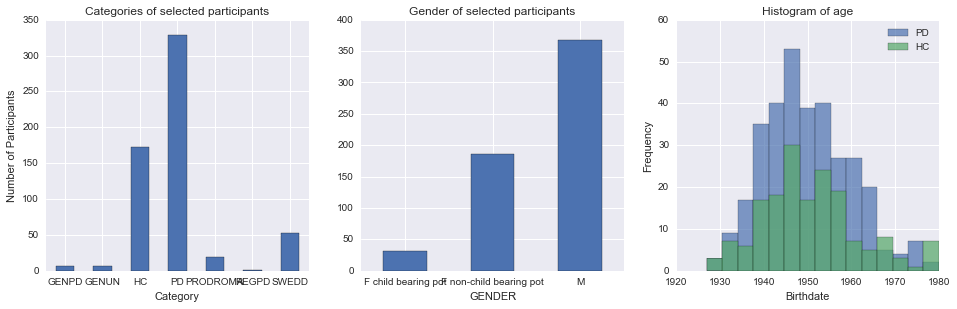

In [53]:
plt.figure(1, figsize=(16, 4.5))

# plot the categories distribution
plt.subplot(1,3,1)
plot_1 = data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size().plot(kind='bar', \
                                    title="Categories of selected participants", rot=0, ax=plt.gca())
plot_1.set_ylabel("Number of Participants"); plot_1.set_xlabel("Category");

# plot the gender distribution
plt.subplot(1,3,2)
data_visits["info"].GENDER.replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M'])\
.reset_index().groupby("GENDER").size().plot(kind='bar', title="Gender of selected participants", rot=0, ax=plt.gca());

# plot the age histogram
plt.subplot(1,3,3)
hc_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'HC'].\
rename(columns={'BIRTHDT':'HC'})

pd_birthdt = data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].\
rename(columns={'BIRTHDT':'PD'})

concat_birthdt = pd.concat([pd_birthdt.PD, hc_birthdt.HC], axis=1)
plot_3 = concat_birthdt.plot(kind='hist', title="Histogram of age", alpha=0.7, bins=15, ax=plt.gca())
plot_3.set_xlabel("Birthdate");
data_visits["info"].ENROLL_CAT.reset_index().groupby("ENROLL_CAT").size()

### 2.1. Stats for Table 1 paper

In [4]:
data_visits["info"].GENDER.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].replace([0, 1, 2], ['F child bearing pot', 'F non-child bearing pot', 'M']).reset_index().groupby("GENDER").size()

GENDER
F child bearing pot         20
F non-child bearing pot     94
M                          214
dtype: int64

In [5]:
data_visits["info"].BIRTHDT.reset_index()[data_visits["info"].reset_index()['ENROLL_CAT'] == 'PD'].set_index(["PATNO"]).describe()

,BIRTHDT
count,328.000000
mean,1949.990854
std,9.846059
min,1927.000000
25%,1943.000000
50%,1949.000000
75%,1957.000000
max,1979.000000


In [6]:
list_case_control = data_visits["info"].reset_index().PATNO[data_visits["info"].reset_index()['ENROLL_CAT'] == 'HC']
family_history_pd_col = ['BIOMOMPD', 'BIODADPD', 'MAGPARPD', 'PAGPARPD', 'FULSIBPD', 'HAFSIBPD', 'MATAUPD', 'PATAUPD', 'KIDSPD']
family_history_sum = family_history[family_history_pd_col].sum(axis=1)[family_history.index.isin(list_case_control)]

family_history_sum[family_history_sum >= 1].count()

10

## 3. Vectorizing time-series data into one series

Dropping non-progression related columns:

In [7]:
t1 = data_visits['updrs1'].drop('INFODT',axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t2 = data_visits['updrs1pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t3 = data_visits['updrs2pq'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t4 = data_visits['updrs3'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t5 = data_visits['epworth'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t6 = data_visits['moca'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t7 = data_visits['benton'].drop_duplicates(['PATNO','EVENT_ID'], keep='first').set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t8 = data_visits['neuro_cranial'][data_visits['neuro_cranial'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
t9 = data_visits['geriatric'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t10 = data_visits['hopkins_verbal'][data_visits['hopkins_verbal'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t11 = data_visits['letter_seq'][data_visits['letter_seq'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t12 = data_visits['quip'][data_visits['quip'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t13 = data_visits['rem'][data_visits['rem'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t14 = data_visits['aut'][data_visits['aut'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t15 = data_visits['semantic'][data_visits['semantic'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t16 = data_visits['stai'][data_visits['stai'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
t17 = data_visits['sdm'][data_visits['sdm'].EVENT_ID != 'V03' ].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')

## The following will be added only for PD analysis 
# only PD
# t10 = data_visits['updrs3a'].drop(['PAG_NAME','CMEDTM','EXAMTM','PD_MED_USE','ON_OFF_DOSE','ANNUAL_TIME_BTW_DOSE_NUPDRS'],axis=1).set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)
# t11 = data_visits['updrs4'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1, limit=10, limit_direction='both')
# t12 = data_visits['schwab'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

# chores
# t15 = data_visits['pase_house'].set_index(['PATNO','EVENT_ID']).sort_index(level='PATNO').unstack().reset_index().set_index('PATNO').interpolate(method='linear', axis=1)

M = pd.concat([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

## 4. Normalization

Evaluating both z-score and min-max normalizations:

In [8]:
# normalize values based on z-score
data_visits_zs = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_zs[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].mean().mean()) / t16['a_state'].stack().std()
        data_visits_zs[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].mean().mean()) / eval(dataset)[col].stack().std()

data_visits_zs['t17']

# construct full M
M_zs = pd.concat([data_visits_zs['t1'], data_visits_zs['t2'], data_visits_zs['t3'], data_visits_zs['t4'], 
                  data_visits_zs['t5'], data_visits_zs['t6'] , data_visits_zs['t7'], data_visits_zs['t8'], 
                  data_visits_zs['t9'], data_visits_zs['t10'], data_visits_zs['t11'], data_visits_zs['t12'], 
                  data_visits_zs['t13'], data_visits_zs['t14'], data_visits_zs['t15'],data_visits_zs['t16'],
                  data_visits_zs['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

In [9]:
# normalize values based on min-max
data_visits_minmax = {}
minmax_min = {}
minmax_max = {}
for i in range(1, len(datasets_of_interest) + 1):
    dataset = 't' + str(i)
    dataset_columns = eval(dataset).columns.levels[0][0:-1]
    
    # create an empty dataframe: t16_zs = pd.DataFrame(index=t16.index, columns=t16.columns)
    data_visits_minmax[dataset] = pd.DataFrame(index=eval(dataset).index, columns=eval(dataset).columns)
    minmax_min[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    minmax_max[dataset] = pd.DataFrame(index=[1], columns=eval(dataset).columns)
    
    for col in dataset_columns:
        # assign normalized: t16_zs['a_state'] = (t16['a_state'] - t16['a_state'].min().min()) / (df.max() - df.min())
        data_visits_minmax[dataset][col] = (eval(dataset)[col] - eval(dataset)[col].min().min()) / (eval(dataset)[col].max().max() - eval(dataset)[col].min().min() )
        minmax_min[dataset][col] = eval(dataset)[col].min().min()
        minmax_max[dataset][col] = eval(dataset)[col].max().max()
    
data_visits_minmax['t17'].min()

# construct full M
M_minmax = pd.concat([data_visits_minmax['t1'], data_visits_minmax['t2'], data_visits_minmax['t3'], data_visits_minmax['t4'], 
                  data_visits_minmax['t5'], data_visits_minmax['t6'] , data_visits_minmax['t7'], data_visits_minmax['t8'], 
                  data_visits_minmax['t9'], data_visits_minmax['t10'], data_visits_minmax['t11'], data_visits_minmax['t12'], 
                  data_visits_minmax['t13'], data_visits_minmax['t14'], data_visits_minmax['t15'],data_visits_minmax['t16'],
                  data_visits_minmax['t17']], axis=1).interpolate(method='linear', axis=1, limit=10, limit_direction='both')

# construct min array for export
M_minmax_min = pd.concat([minmax_min['t1'], minmax_min['t2'], minmax_min['t3'], minmax_min['t4'], 
                  minmax_min['t5'], minmax_min['t6'] , minmax_min['t7'], minmax_min['t8'], 
                  minmax_min['t9'], minmax_min['t10'], minmax_min['t11'], minmax_min['t12'], 
                  minmax_min['t13'], minmax_min['t14'], minmax_min['t15'],minmax_min['t16'],
                  minmax_min['t17']], axis=1)

M_minmax_max = pd.concat([minmax_max['t1'], minmax_max['t2'], minmax_max['t3'], minmax_max['t4'], 
                  minmax_max['t5'], minmax_max['t6'] , minmax_max['t7'], minmax_max['t8'], 
                  minmax_max['t9'], minmax_max['t10'], minmax_max['t11'], minmax_max['t12'], 
                  minmax_max['t13'], minmax_max['t14'], minmax_max['t15'],minmax_max['t16'],
                  minmax_max['t17']], axis=1)

## 5. Dimension reduction to progression space

Evaluating PCA, ICA, and NMF for the more appropriate repressiontation of disease progression:

In [10]:
M_chosen = M_minmax #M_zs #M # choosing Min-Max normalized data withh all features

M_cat = pd.concat([M_chosen, data_visits["info"].ENROLL_CAT], axis=1) # labels of selected subjects

M_W_columns = ['PCA_1', 'PCA_2', 'PCA_3', 'ICA_1', 'ICA_2', 'NMF_2_1', 'NMF_2_2', 
               'NMF_3_1', 'NMF_3_2', 'NMF_3_3']
M_W = pd.DataFrame(index=M_chosen.index, columns=M_W_columns)

# PCA
from sklearn.decomposition import PCA as sklearnPCA
model_pca = sklearnPCA(n_components=3)
M_W[['PCA_1', 'PCA_2', 'PCA_3']] = model_pca.fit_transform(M_chosen)

# NMF
from sklearn import decomposition
model_NMF = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3 = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
M_W[['NMF_2_1', 'NMF_2_2']] = model_NMF.fit_transform(M_chosen)
M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)

# ICA
model_ICA = decomposition.FastICA(n_components=2)
M_W[['ICA_1', 'ICA_2']] = model_ICA.fit_transform(M_chosen)

## 6. Visualization of progression space in 2D

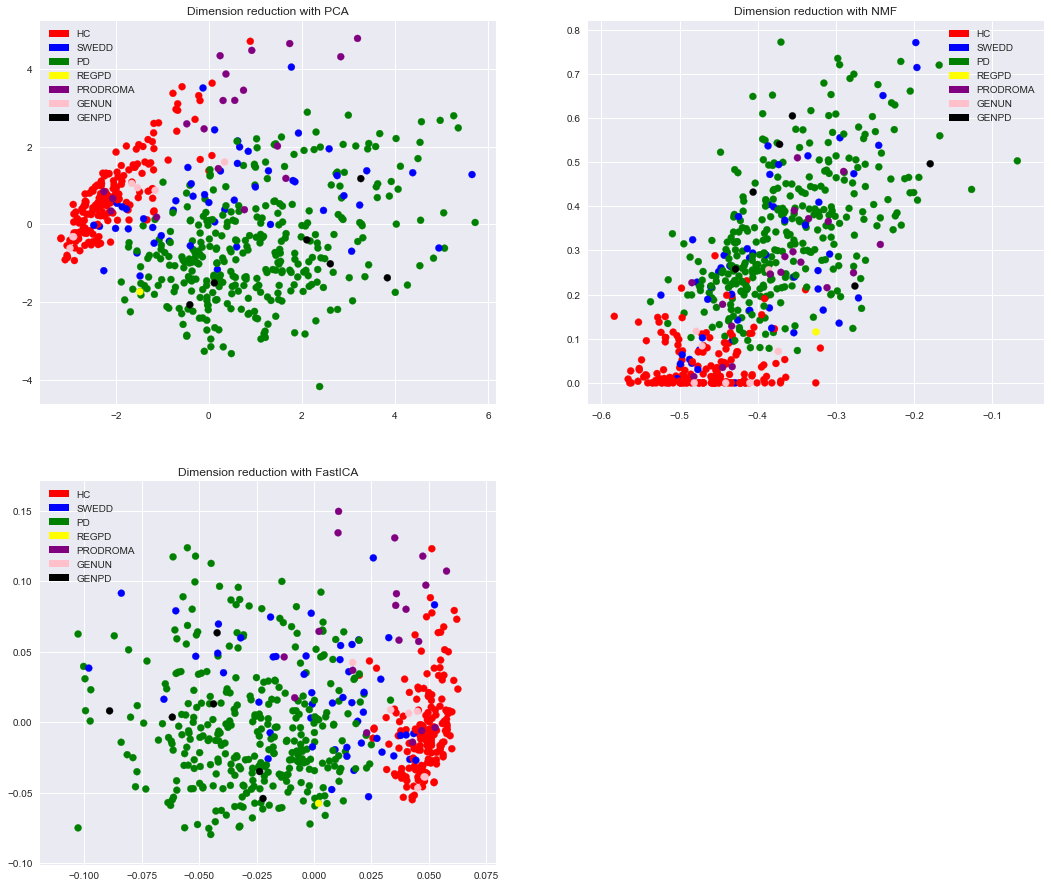

In [11]:
# plot the dimension reduction color makrked with participants' "categories", and "gender"
%matplotlib inline
plt.figure(1, figsize=(18, 24))

## PCA 
plt.subplot(3,2,1)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['PCA_1']], M_W[['PCA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with PCA')


## NMF 
plt.subplot(3,2,2)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(-M_W[['NMF_2_1']], M_W[['NMF_2_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with NMF')
# plt.plot([0.3,0.6], [0,0.5])
# plt.plot([0.2,0.5], [0.1,0.6])

## ICA
plt.subplot(3,2,3)
colors_categories = data_visits["info"].ENROLL_CAT.replace(['HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'], ['red', 'blue', 'green', 'yellow', 'purple', 'pink', 'black'])

plot_1 = plt.scatter(M_W[['ICA_1']], M_W[['ICA_2']], c = colors_categories)

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p5 = plt.Rectangle((0, 0), 0.1, 0.1, fc='purple')
p6 = plt.Rectangle((0, 0), 0.1, 0.1, fc='pink')
p7 = plt.Rectangle((0, 0), 0.1, 0.1, fc='black')
plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');
plt.title('Dimension reduction with FastICA')


NMF shows a clear progression of disorder, let's dive into more in depth analysis of progression space. Focusing on HC, and PD:

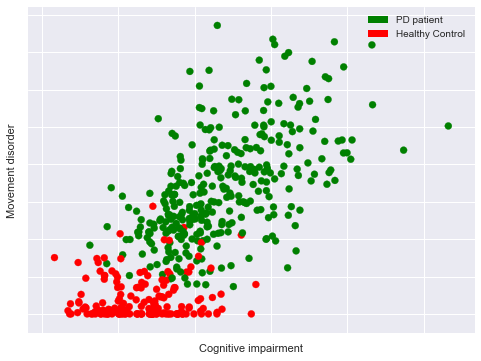

In [663]:
## NMF 
%matplotlib inline
plt.figure(1, figsize=(8, 6))

M_W_select = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
plt.scatter(-M_W_select[['NMF_2_1']], M_W_select[['NMF_2_2']], c = colors_categories[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ])

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')

plt.legend((p3, p1), ('PD patient','Healthy Control'), loc='best');
#plt.title('Dimension reduction with NMF')

plt.grid(True)
ax = plt.axes()
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')

## 7. Visualization of progression space in 3D

<IPython.core.display.Javascript object>


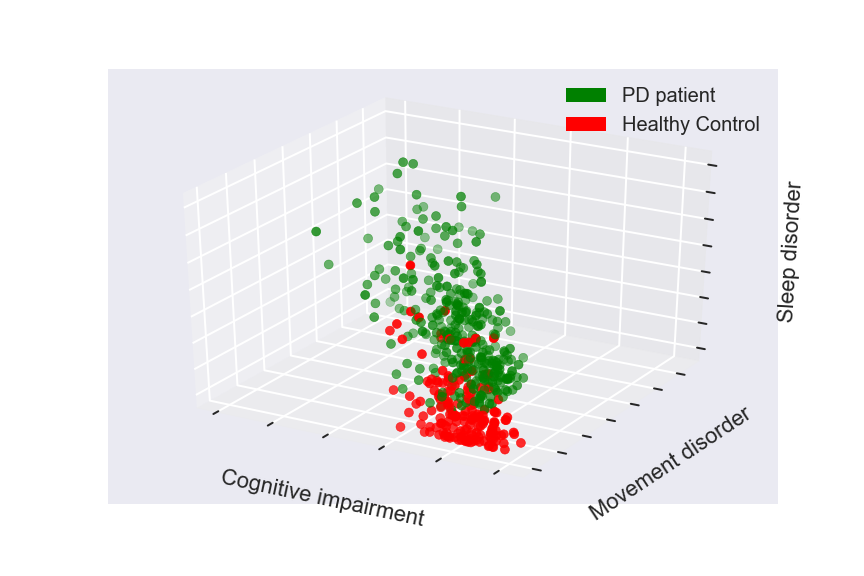

In [695]:
# NMF 3 color makrked with participants' "categories"
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
M_W_PD_HC = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors_categories[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ])


plt.legend((p3, p1), ('PD patient','Healthy Control' ), loc='best');

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive impairment')
ax.set_ylabel('Movement disorder')
ax.set_zlabel('Sleep disorder')

## 8. Dimension mapping

/Users/faraz/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


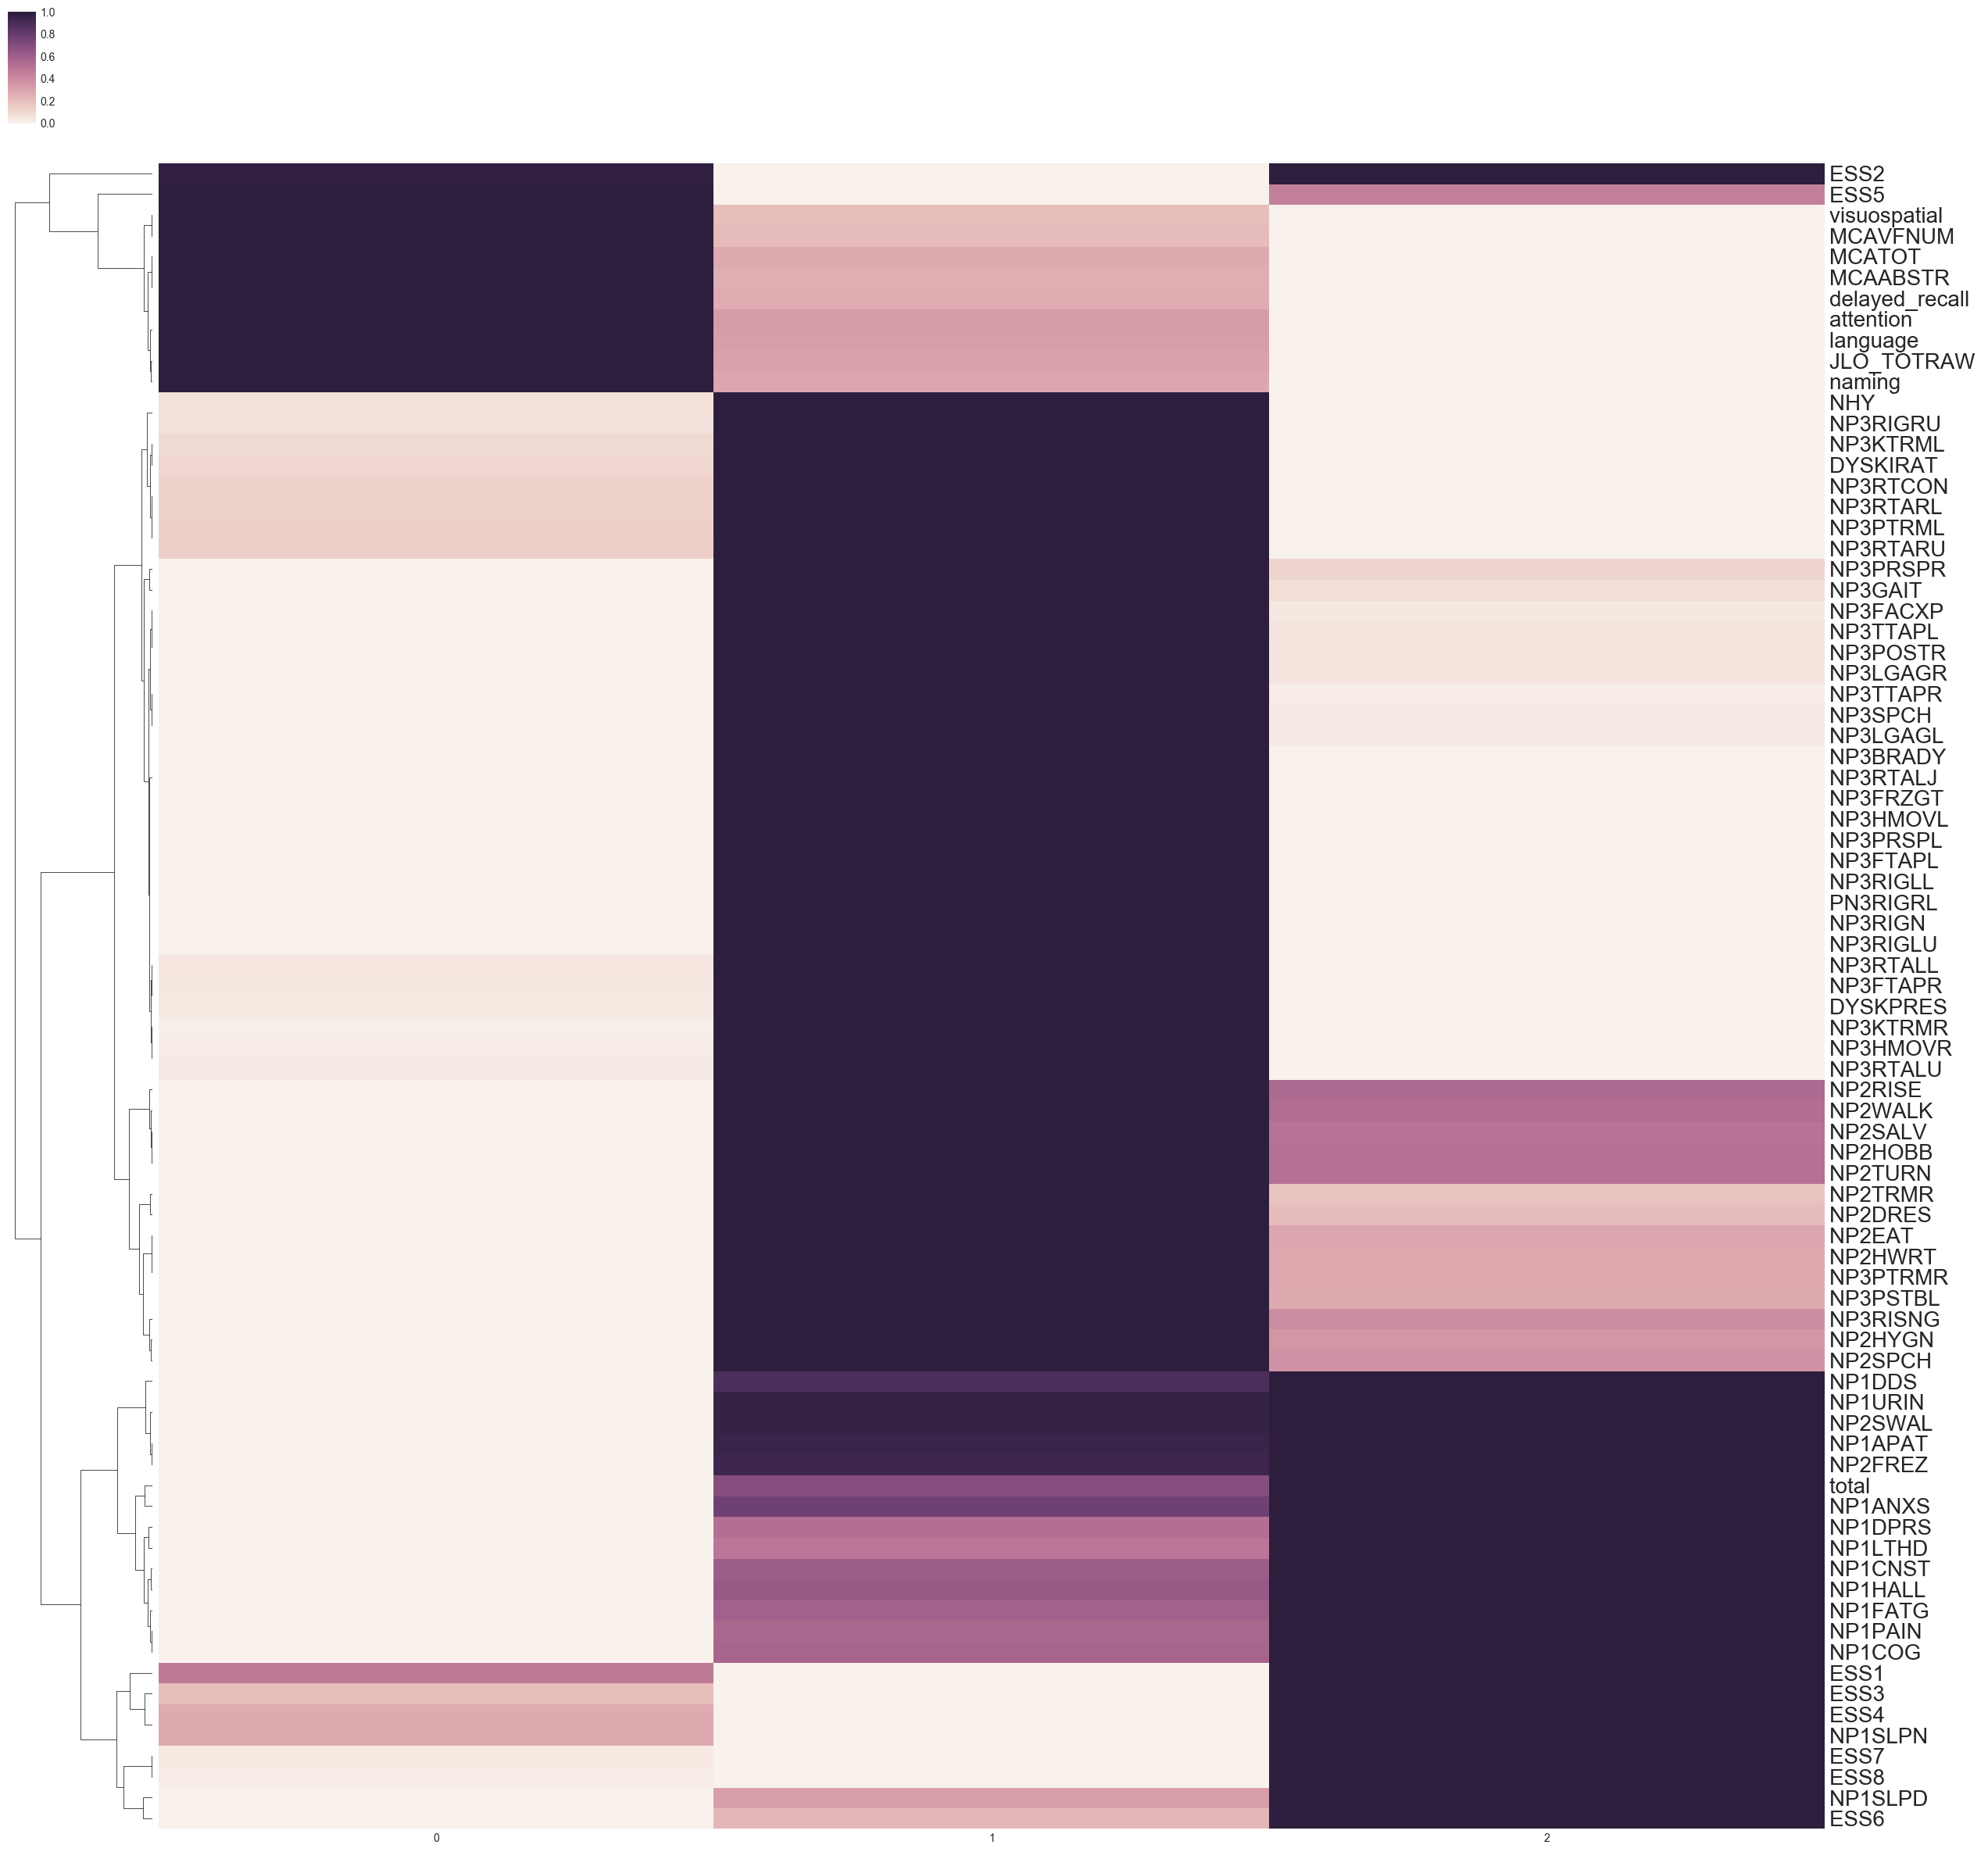

In [835]:
import seaborn as sns

# M_W[['NMF_3_1', 'NMF_3_2', 'NMF_3_3']] = model_NMF3.fit_transform(M_chosen)
model_NMF3.fit_transform(M_chosen)
# M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']]
H = model_NMF3.components_

H_columns = M_chosen.columns
M_H = pd.DataFrame(data=H, columns=H_columns)
# M_H.loc[]= 
M_H 
# M_H.loc[0] = H[0,:]
# M_H.loc[1] = H[1,:]
# M_H.loc[2] = H[2,:]
M_H = M_H.ix[:, M_H.columns.get_level_values(1)=='V03'] 
M_H.columns = [' '.join(col).strip().replace('V03','') for col in M_H.columns.values]
# M_H_T = M_H.T.sort([1],ascending=False)
M_H_T = M_H.T.sort_values(by=[2],ascending=False)
M_H_T
sns.heatmap(M_H_T)

%matplotlib inline
a4_dims = (5, 30)
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.heatmap(ax=ax, data=M_H_T )
# sns.clustermap(data=M_H_T, col_cluster=False, standard_scale=1)
cg = sns.clustermap(data=M_H_T, col_cluster=False, figsize=(30, 30), standard_scale=3)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);


In [880]:
model_NMF3.components_[0,:].sum() / (model_NMF3.components_.sum())

0.28923844464797493

In [866]:
model_NMF4.components_[2,:].sum()

88.796811952347028

/Users/faraz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/faraz/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


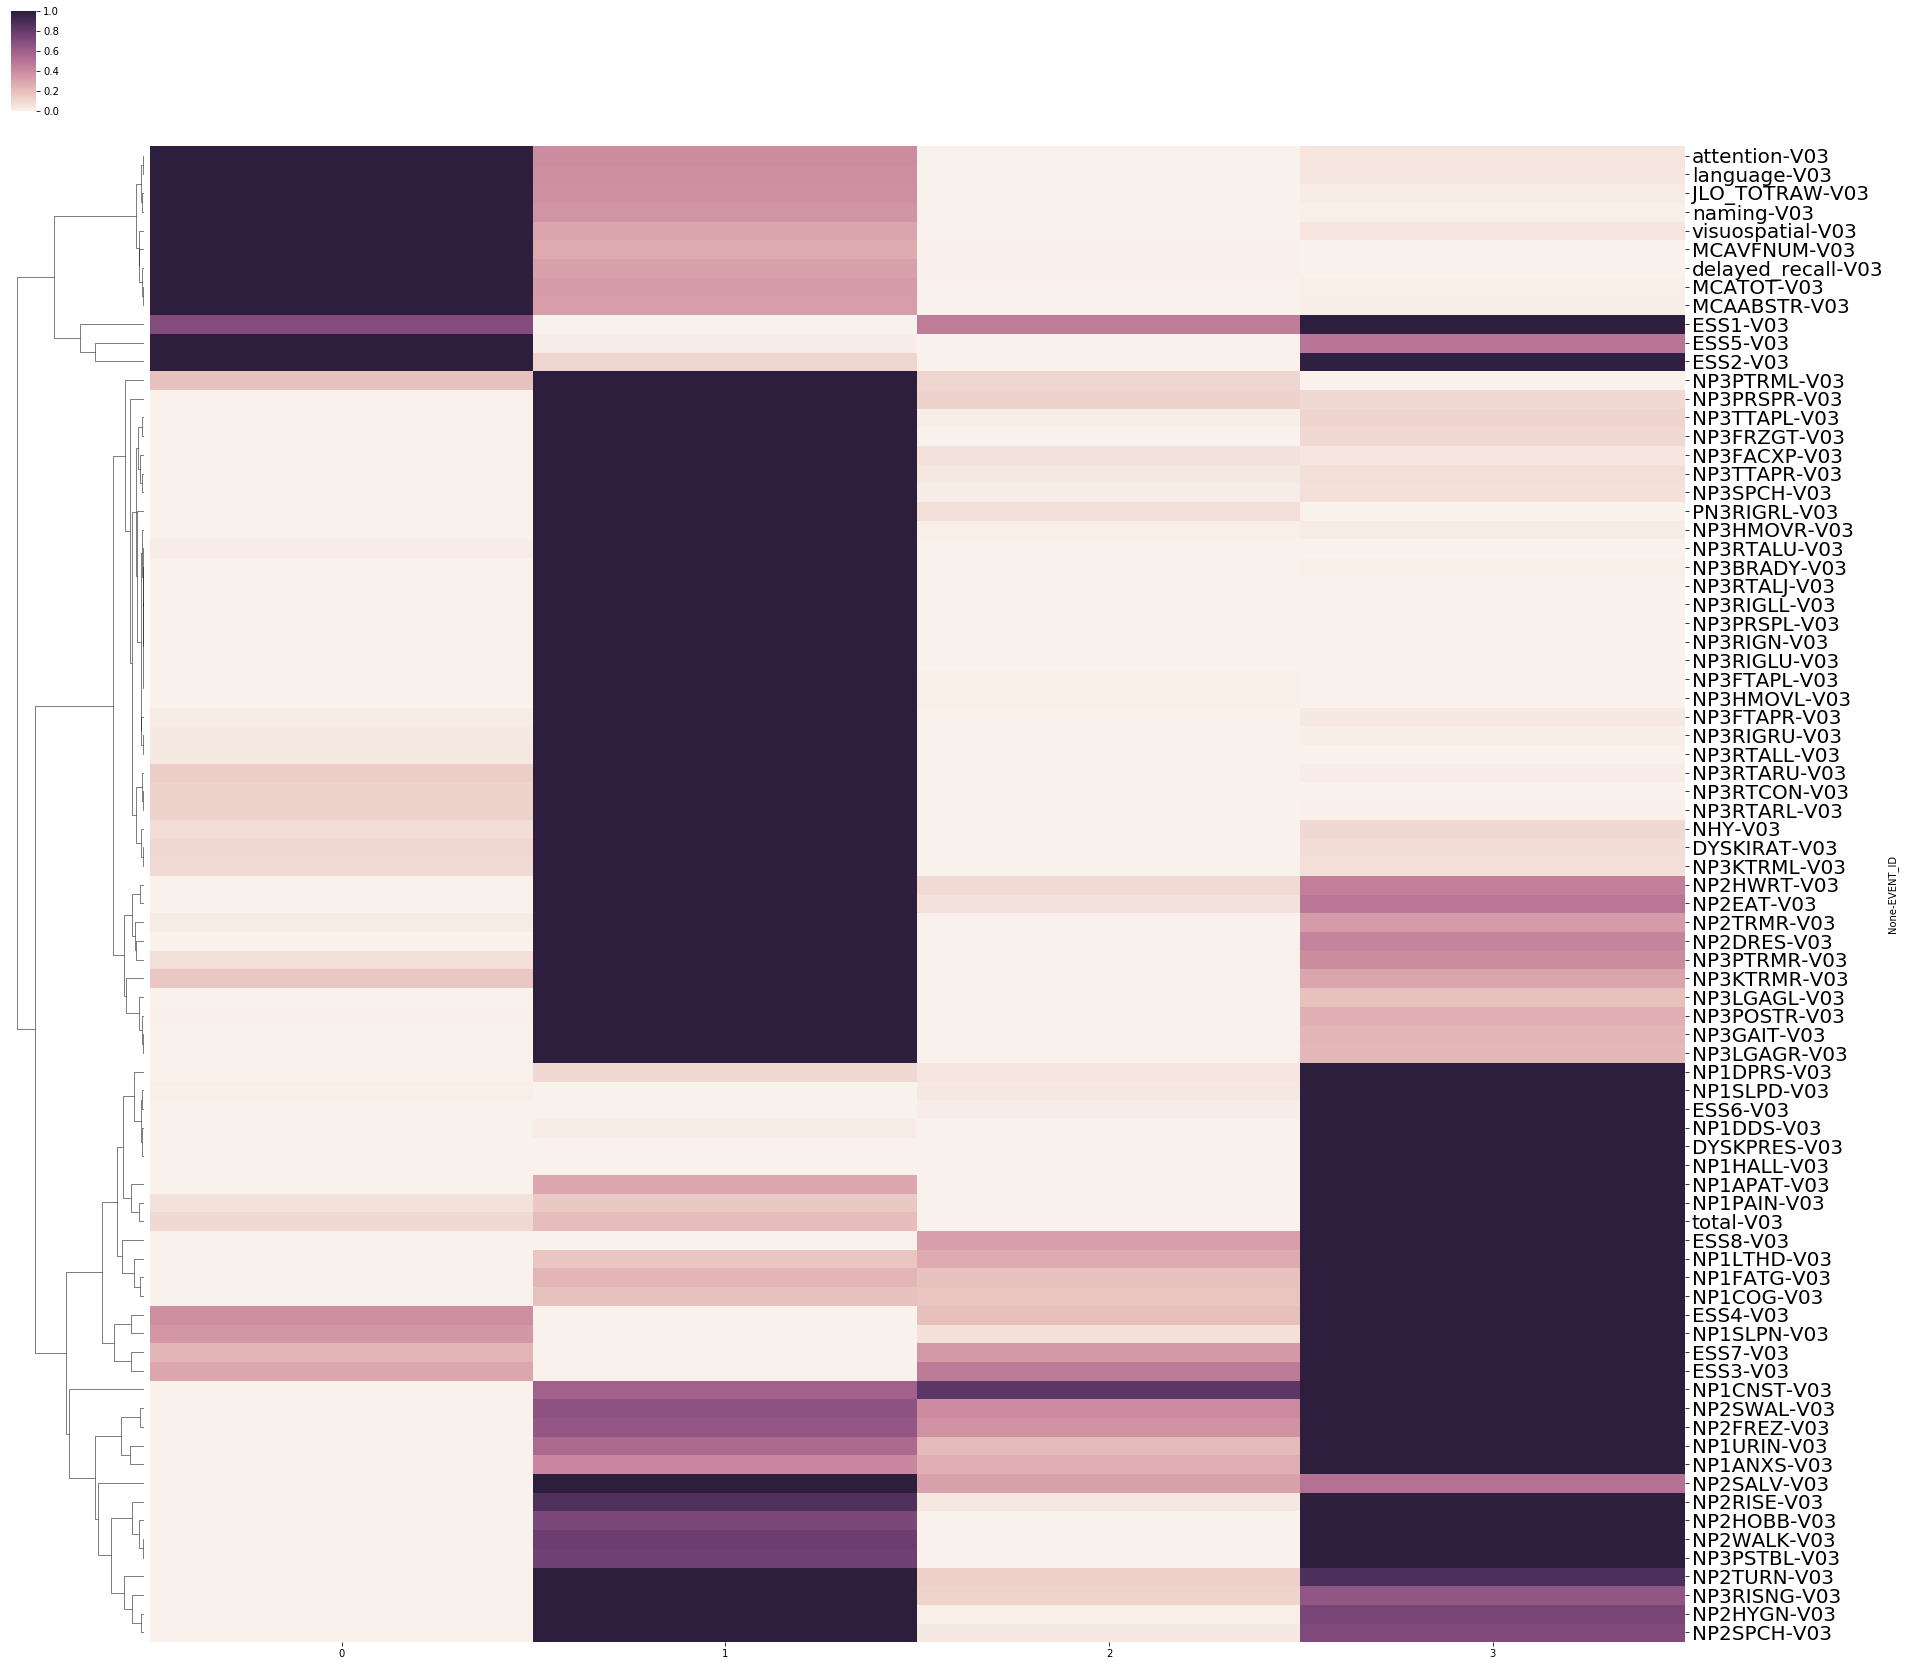

In [862]:
model_NMF4 = decomposition.NMF(n_components=4, init='nndsvda', max_iter=200)
model_NMF4.fit_transform(M_chosen)
H = model_NMF4.components_
H_columns = M_chosen.columns
M_H = pd.DataFrame(columns=H_columns)
M_H.loc[0] = H[0,:]
M_H.loc[1] = H[1,:]
M_H.loc[2] = H[2,:]
M_H.loc[3] = H[3,:]
M_H = M_H.ix[:, M_H.columns.get_level_values(1)=='V03'] 
# M_H.columns = [' '.join(col).strip() for col in M_H.columns.values]
M_H_T = M_H.T.sort([1],ascending=False)
M_H_T
cg = sns.clustermap(data=M_H_T, col_cluster=False, figsize=(30, 30), standard_scale=3)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20);

## 8. Unsuperviside learning for categorization using GMM unsupervised

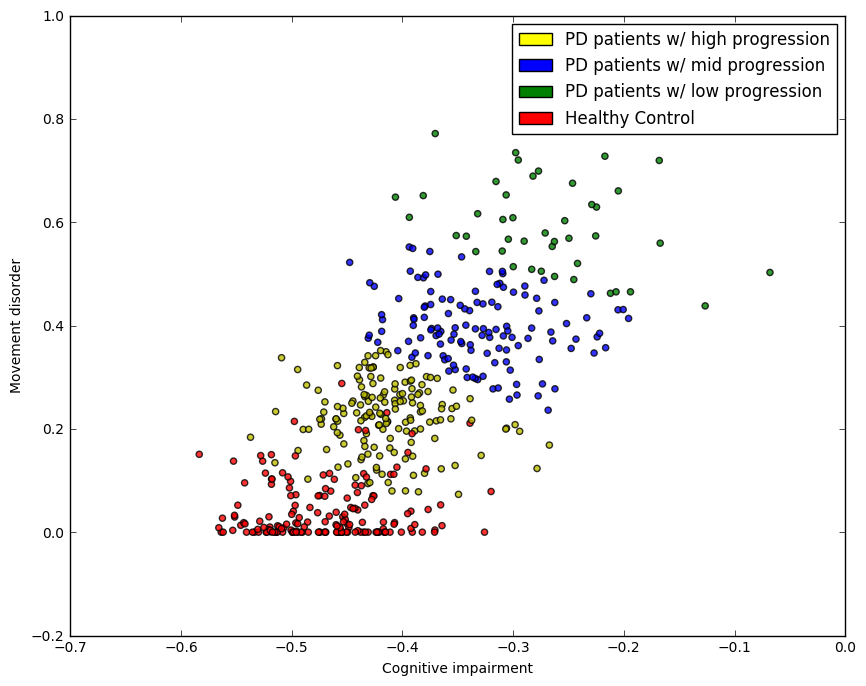

In [827]:
# label HC as HC
M_label_columns = ['GMM']
M_label = pd.DataFrame(index=M_chosen.index, columns=M_label_columns)

M_label[ M_cat.ENROLL_CAT == "HC" ] = 'HC'
M_label[ M_cat.ENROLL_CAT == "SWEDD" ] = 'SWEDD'

# label PD using GMM
M_gmm_chosen = M_W[['NMF_2_1', 'NMF_2_2']] #M_W[['PCA_1', 'PCA_2']]
M_PD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT == "PD" ]
M_PD_HC_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_PD_HC_SWEDD_gmm_chosen = M_gmm_chosen[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

from sklearn import mixture
model_gmm = mixture.GaussianMixture(n_components=3, covariance_type='tied')
model_gmm.fit(M_PD_gmm_chosen) # print(gmm.means_)

# label the predicted and only keep HC and PDs
M_label.loc[ M_cat.ENROLL_CAT == "PD", 'GMM' ] = model_gmm.predict(M_PD_gmm_chosen)
M_label.replace([1,0,2],['PD_l', 'PD_m', 'PD_h'], inplace=True)
M_label_PD = M_label[ M_cat.ENROLL_CAT.isin(['PD']) ]
M_label_PD_HC = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
M_label_PD_HC_SWEDD = M_label[ M_cat.ENROLL_CAT.isin(['HC', 'PD', 'SWEDD']) ]

# plot only predicted PD
%matplotlib inline
# plt.figure(1, figsize=(20, 16))
# plt.subplot(2,2,1)
# colors = ['b' if i==0 else 'g' if i==1 else 'y' if i==2 else 'r' for i in model_gmm.predict(M_PD_gmm_chosen)]
# ax = plt.scatter(-M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()
# # ax.scatter(M_PD_gmm_chosen[[0]], M_PD_gmm_chosen[[1]], c=colors, alpha=0.8)
# p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
# p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
# p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
# plt.legend((p1, p2, p3), ('PD High', 'PD Mid', 'PD Low'), loc='best');
# plt.title('Labeling PD based on GMM')

# plot predicted PD and HC
# plt.subplot(2,2,2)
plt.figure(1, figsize=(10, 8))
colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
ax = plt.scatter(-M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()
# ax.scatter(M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PD patients w/ high progression', 'PD patients w/ mid progression', 'PD patients w/ low progression', 'Healthy Control'), loc='best');
# plt.title('Adding HC to the labeld PD')
# plt.axes().set_xticklabels([])
# plt.axes().set_yticklabels([])
plt.axes().set_xlabel('Cognitive impairment')
plt.axes().set_ylabel('Movement disorder')
# ax.set_zlabel('Sleep disorder')

In [496]:
%store model_gmm
%store M_PD_HC_gmm_chosen

Stored 'model_gmm' (GaussianMixture)
Stored 'M_PD_HC_gmm_chosen' (DataFrame)


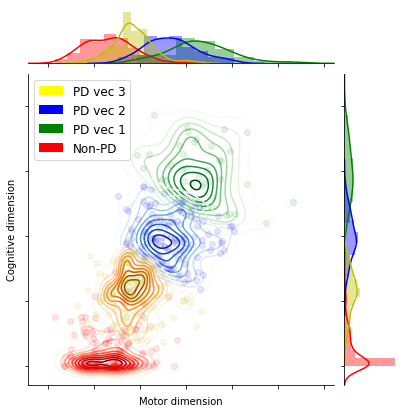

In [853]:
%matplotlib inline

x_hc = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC']),'NMF_2_1']
y_hc = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['HC']),'NMF_2_2']

x_pd_l = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_l']),'NMF_2_1']
y_pd_l = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_l']),'NMF_2_2']

x_pd_m = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_m']),'NMF_2_1']
y_pd_m = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_m']),'NMF_2_2']

x_pd_h = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_h']),'NMF_2_1']
y_pd_h = M_PD_HC_gmm_chosen.loc[M_label.GMM.isin(['PD_h']),'NMF_2_2']

plt.ion()
plt.show()
plt.pause(0.001)
a = 0.1
l = 10
zo = 0

p = sns.JointGrid(x = -x_hc, y = y_hc)
p = p.plot_joint(plt.scatter, c="R", alpha = a)
# p.ax_marg_x.hist(-x_hc, alpha = 0.5, color='r')
# p.ax_marg_y.hist(y_hc, orientation = 'horizontal', alpha = 0.5, color='r')
p.plot_marginals(sns.distplot, color='r', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Reds")

p.x = -x_pd_l
p.y = y_pd_l
p.plot_joint(plt.scatter, c="g", alpha = a)
p.plot_marginals(sns.distplot, color='g', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Greens")

p.x = -x_pd_m
p.y = y_pd_m
p.plot_joint(plt.scatter, c="b", alpha = a)
p.plot_marginals(sns.distplot, color='b', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Blues")

p.x = -x_pd_h
p.y = y_pd_h
p.plot_joint(plt.scatter, c="y", alpha = a)
p.plot_marginals(sns.distplot, color='y', axlabel=[])
p.plot_joint(sns.kdeplot, zorder=zo, n_levels=l, cmap="Oranges")

p.set_axis_labels(xlabel='Motor dimension', ylabel='Cognitive dimension')
p.ax_joint.set_xticklabels([])
p.ax_joint.set_yticklabels([])
# p.ax_marg_x.legend_.remove()

p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
plt.legend((p1, p2, p3, p4), ('PD vec 3', 'PD vec 2', 'PD vec 1', 'Non-PD'), loc='best',prop={'size':12});


<IPython.core.display.Javascript object>


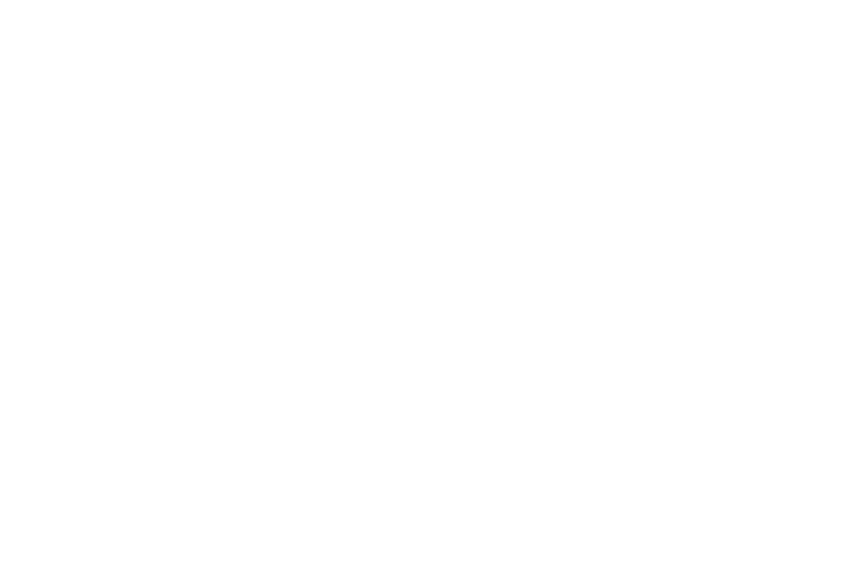

<IPython.core.display.Javascript object>


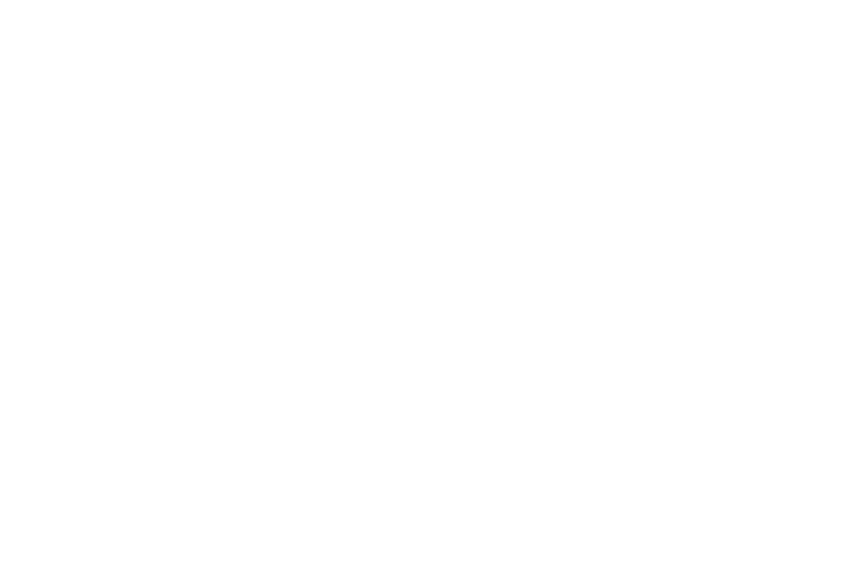

In [850]:
# NMF 3 color makrked with participants' "categories"
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

mpl.style.use('seaborn-colorblind')
ax = plt.axes(projection='3d')

# plots all
# ax.scatter(M_W[['NMF_3_1']], M_W[['NMF_3_2']], M_W[['NMF_3_3']], c = colors_categories)
# plt.legend((p1, p2, p3, p4, p5, p6, p7), ('HC', 'SWEDD', 'PD', 'REGPD', 'PRODROMA', 'GENUN', 'GENPD'), loc='best');

# plots onlt PD and HC
# colors = ['r' if i=='HC' else 'g' if i=='PD_l' else 'b' if i=='PD_m' else 'y' if i=='PD_h' else 'black' for i in M_label_PD_HC['GMM']]
# ax = plt.scatter(-M_PD_HC_gmm_chosen[[0]], M_PD_HC_gmm_chosen[[1]], c=colors, alpha=0.8)#gca()


M_W_PD_HC = M_W.loc[ M_cat.ENROLL_CAT.isin(['HC', 'PD']) ]
ax.scatter(M_W_PD_HC[['NMF_3_1']], M_W_PD_HC[['NMF_3_2']], M_W_PD_HC[['NMF_3_3']], c = colors, alpha=0.8)
p1 = plt.Rectangle((0, 0), 0.1, 0.1, fc='yellow')
p2 = plt.Rectangle((0, 0), 0.1, 0.1, fc='blue')
p3 = plt.Rectangle((0, 0), 0.1, 0.1, fc='green')
p4 = plt.Rectangle((0, 0), 0.1, 0.1, fc='red')
# plt.legend((p1, p2, p3, p4), ('PD vec 3', 'PD vec 2', 'PD vec 1', 'Non-PD'), loc='best',prop={'size':12});

ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Cognitive dimension (CD)')
ax.set_ylabel('Motor dimension (MD)')
ax.set_zlabel('Sleep dimension (SD)')


# defult: elev = 30, -60 degree
ax.view_init(elev=30., azim=30)
# ax.view_init(elev=90, azim=0)

In [702]:
 print(plt.style.available)

['seaborn-talk', 'seaborn-notebook', 'fivethirtyeight', 'seaborn', 'seaborn-paper', 'seaborn-whitegrid', 'dark_background', 'grayscale', 'seaborn-ticks', 'bmh', 'seaborn-dark', 'seaborn-poster', 'seaborn-white', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-deep', 'classic', 'seaborn-pastel', 'seaborn-muted', 'seaborn-dark-palette', 'seaborn-colorblind', 'ggplot']


### 8.1 distribution of classes

In [494]:
# M_W_PD_HC[['NMF_3_1','NMF_3_2','NMF_3_3']].to_csv("M_nmf_PD_HC.csv")
M_label_PD_HC.to_csv("M_label_PD_HC.csv")

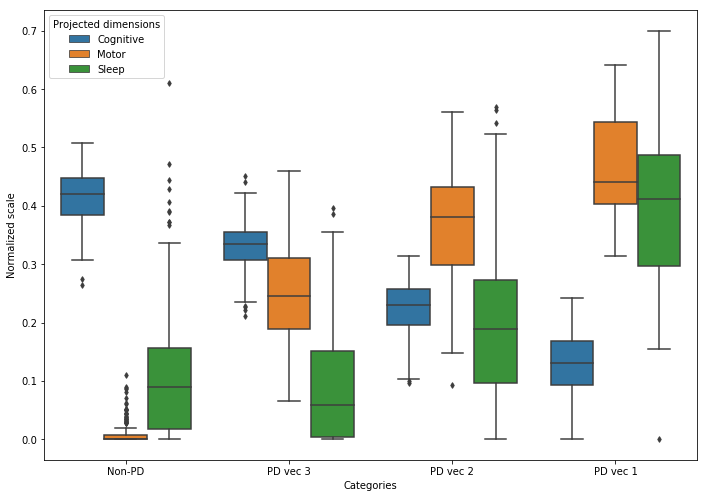

In [848]:
M_boxbar = M_W[['NMF_3_1','NMF_3_2','NMF_3_3']]
M_boxbar.columns = ['Cognitive', 'Motor', 'Sleep']
M_boxbar = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PD vec 1', 'PD vec 2', 'PD vec 3'])
                      , M_boxbar], axis=1, join='inner')
# M_boxbar['Cognitive impairment'] = -M_boxbar['Cognitive impairment']

a = M_boxbar.reset_index().set_index(['PATNO','GMM']).stack().reset_index().set_index('PATNO')
a.columns = ['Categories', 'Projected dimensions', 'Normalized scale']
a['Normalized scale'] = a['Normalized scale'].apply(pd.to_numeric)

# plot
%matplotlib inline
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
cg = sns.boxplot(x="Categories", y="Normalized scale", hue="Projected dimensions", data=a, fliersize=4, ax=ax);

# alternative plot
# g = sns.FacetGrid(col="GMM", data=a);
# g = g.map(sns.boxplot, "hue", "value")


### 8.2. Timeline of classes

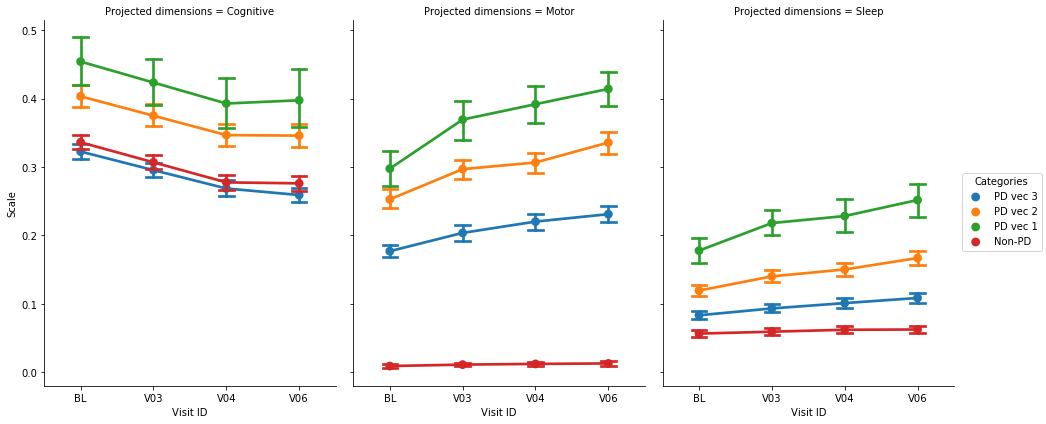

In [847]:
from sklearn.cluster import KMeans
mpl.style.use('default')

# Clustering columns
M_H.T.sort_values(by=[0],ascending=False).head(11)
M_H_T = M_H.T.sort_values(by=[1],ascending=False)

kmeans = KMeans(n_clusters=3, random_state=0).fit(M_H_T)

#plot in 3D
# ax = plt.axes(projection='3d')
# ax.scatter(M_H_T[[0]], M_H_T[[1]], M_H_T[[2]], c=kmeans.labels_, alpha = 0.8)

# Columns 
# np.unique(kmeans.labels_, return_counts=True)
cog_cols = M_H_T[kmeans.labels_ == 1].index.values.tolist()
mov_cols = M_H_T[kmeans.labels_ == 2].index.values.tolist()
sleep_cols = M_H_T[kmeans.labels_ == 0].index.values.tolist()

cog_cols = np.char.strip(cog_cols)
cog_cols = np.delete(cog_cols, 6) # ESS remove // not remove :: pd.concat([M_cog.mean(axis=1)-0.5
mov_cols = np.char.strip(mov_cols)
sleep_cols = np.char.strip(sleep_cols)

M_cog = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(cog_cols)].stack()#.reset_index().set_index('PATNO')
M_mov = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(mov_cols)].stack()#.reset_index().set_index('PATNO')
M_sleep = M_chosen.loc[:, M_chosen.columns.get_level_values(0).isin(sleep_cols)].stack()#.reset_index().set_index('PATNO')

a = pd.concat([-M_cog.mean(axis=1)+1.0, M_mov.mean(axis=1), M_sleep.mean(axis=1)], axis=1, join='inner')
a.columns = ['Cognitive', 'Motor', 'Sleep']
a = a.stack().reset_index().set_index("PATNO")
b = pd.concat([M_label_PD_HC.replace(['HC','PD_l', 'PD_m', 'PD_h'] , 
                                            ['Non-PD','PD vec 1', 'PD vec 2', 'PD vec 3'])
                      , a], axis=1, join_axes=[a.index])
b.columns = ['Categories', 'Visit ID', 'Projected dimensions', 'Scale']
# plot
# https://seaborn.pydata.org/examples/pointplot_anova.html
%matplotlib inline
a4_dims = (11.7, 8.27)
g = sns.factorplot(x="Visit ID", y='Scale', hue="Categories", col='Projected dimensions', data=b,
                   hue_order =['PD vec 3', 'PD vec 2', 'PD vec 1', 'Non-PD'],
                   capsize=0.2,  size=6, aspect=.75)

# g.despine(left=True)


In [596]:
a.reset_index().set_index(['PATNO','EVENT_ID']).to_csv('M_nmf_timeline_PD_HC.csv')

## 9. Supervised Classification based on progression
### 9.1  Compare different algorithms

In [506]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

h = .02  # step size in the mesh

/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


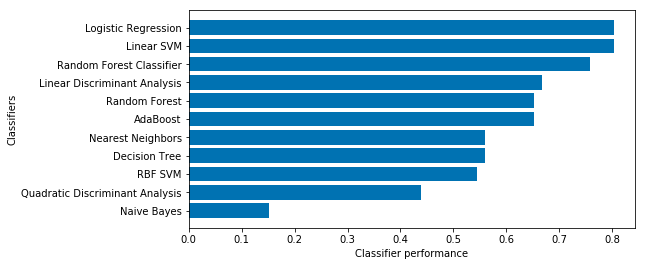

In [980]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis", "Logistic Regression"
         , "Random Forest Classifier"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators = 40)]

# data process
X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

Compare on NMF input:

In [502]:
X.shape

(500, 3)

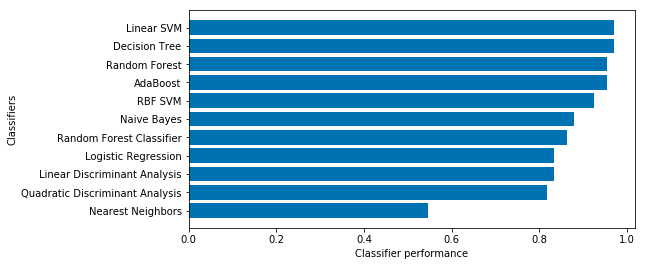

In [1212]:
# data process
# X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X = M_W_PD_HC.loc[M_cat.ENROLL_CAT == "PD", ['NMF_3_1', 'NMF_3_2', 'NMF_3_3']]
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

In [1213]:
naive = RandomForestClassifier(n_estimators = 40)
naive.fit(X_train, y_train)
print(accuracy_score(Y_test, naive.predict(X_test)))
naive.score(X_test, y_test)

0.878787878788


0.87878787878787878

In [1214]:
%store naive

Stored 'naive' (RandomForestClassifier)


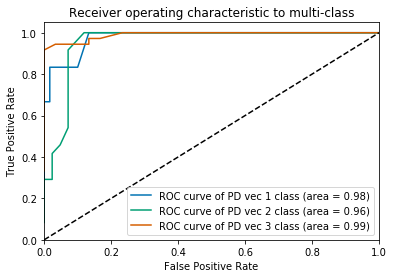

In [972]:
# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = naive.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD vec 1' if i+2==2 else 'PD vec 2' if i+2==3 else 'PD vec 3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

NMF 2D

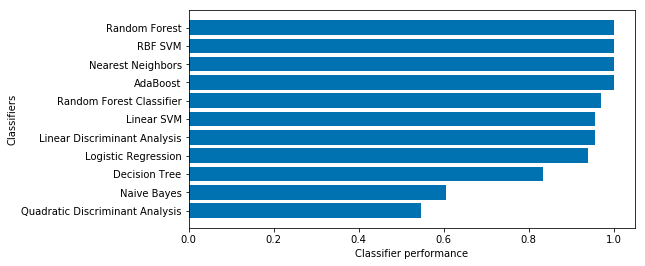

In [1215]:
# data process
# X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X = M_W_PD_HC.loc[M_cat.ENROLL_CAT == "PD", ['NMF_2_1', 'NMF_2_2']]
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

In [1216]:
naive2d = RandomForestClassifier(n_estimators = 40)
naive2d.fit(X_train, y_train)
print(accuracy_score(Y_test, naive2d.predict(X_test)))
naive2d.score(X_test, y_test)

0.969696969697


0.96969696969696972

In [1217]:
%store naive2d

Stored 'naive2d' (RandomForestClassifier)


NMF 3D but only baseline

In [1062]:
model_NMF_baseline = decomposition.NMF(n_components=2, init='nndsvda', max_iter=200)
model_NMF3_baseline = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)
model_NMF4_baseline = decomposition.NMF(n_components=3, init='nndsvda', max_iter=200)

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])


baseline_nmf2d = model_NMF_baseline.fit_transform(X)
baseline_nmf3d = model_NMF3_baseline.fit_transform(X)
baseline_nmf4d = model_NMF4_baseline.fit_transform(X)



In [977]:
basline_nmf3d.shape

(328, 3)

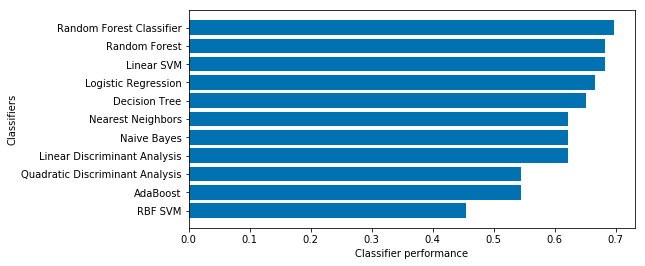

In [1185]:
# data process
# X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X = baseline_nmf2d
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

Ada Boost

In [1200]:

ada = RandomForestClassifier(n_estimators = 50)
ada.fit(X_train, y_train)
print(accuracy_score(Y_test, ada.predict(X_test)))
ada.score(X_test, y_test)

0.621212121212


0.62121212121212122

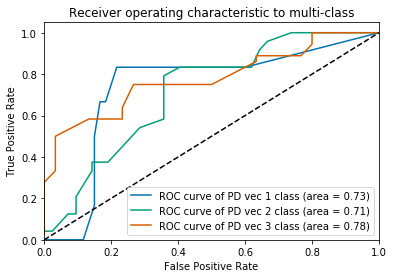

In [1201]:
# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = ada.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD vec 1' if i+2==2 else 'PD vec 2' if i+2==3 else 'PD vec 3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [1202]:
%store ada

Stored 'ada' (RandomForestClassifier)


### 8.2 logistic regression

In [1050]:
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_clinical = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
X_clinical = X_clinical.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
Y_clinical = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_clinical, Y_clinical, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(accuracy_score(Y_test, lr.predict(X_test)))

# from sklearn.externals import joblib
# joblib.dump(lr, '../data/2016-05-25 data/filename.pkl') 
# clf = joblib.load('filename.pkl') 

0.80303030303


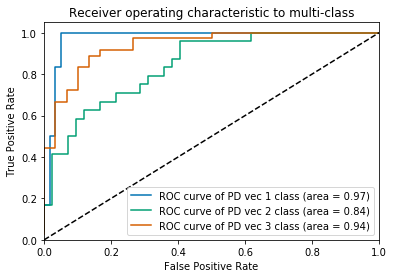

In [1052]:
# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = lr.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD vec 1' if i+2==2 else 'PD vec 2' if i+2==3 else 'PD vec 3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### 10. Find important features from baseline predicting and improving the prediction
### 10.1 Recursive Feature Elimination

In [1055]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X.columns = [' '.join(col).strip() for col in X.columns.values]
Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 54) # the magic number of features 
rfe_fit = rfe.fit(X, Y)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
BL_features = X.columns.get_level_values(0)[rfe_fit.support_]
X.columns.get_level_values(0)[rfe_fit.support_]
# X.columns.get_level_values(0)


Num Features: 54
Selected Features:  [ True False  True  True False False False False  True False False False
 False False  True  True  True  True  True False False False False  True
  True False  True  True  True  True False  True  True  True False  True
  True False  True False False  True False  True False False False  True
  True False  True False  True False False False False False False False
 False  True False  True False False False False False False  True  True
 False  True  True  True False  True False False False  True False False
 False False False False False  True  True False False False  True False
  True False False  True False False False  True  True  True False False
 False  True False False False  True  True  True  True False False False
 False False False False  True False False False False False False False
 False False  True  True False False  True  True]
Feature Ranking:  [ 1 18  1  1 60 85 25 24  1 14 12 40 41 65  1  1  1  1  1 11 29 59 61  1  1
 72  1  1  1  1 

Index(['NP1COG', 'NP1DPRS', 'NP1ANXS', 'NP1PAIN', 'NP2SALV', 'NP2SWAL',
       'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2RISE', 'NP2WALK', 'NP3SPCH',
       'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
       'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPL', 'NP3LGAGR', 'NP3RISNG', 'NP3POSTR',
       'NP3BRADY', 'NP3PTRML', 'NP3KTRML', 'NHY', 'ESS2', 'visuospatial',
       'naming', 'language', 'delayed_recall', 'MCAABSTR', 'MCATOT',
       'CN346RSP', 'HVLTRT1', 'HVLTRT2', 'HVLTFPRL', 'LNS_TOTRAW', 'TMSEX',
       'TMEAT', 'CNTRLEAT', 'TMTORACT', 'DRMAGRAC', 'DRMVERBL', 'DRMFIGHT',
       'DRMUMV', 'DRMOBJFL', 'DEPRS', 'VLTANIM', 'VLTVEG', 'a_trait',
       'SDMTOTAL'],
      dtype='object')

0.818181818182


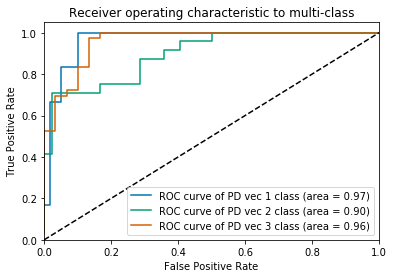

In [1057]:
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_rfe = X.ix[:,X.columns.get_level_values(0)[rfe_fit.support_]]
X_rfe = X_rfe.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X_rfe
Y_rfe = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(accuracy_score(Y_test, lr.predict(X_test)))

# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = lr.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD vec 1' if i+2==2 else 'PD vec 2' if i+2==3 else 'PD vec 3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### 11. Predicting PD progression from baseline + year 1

/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


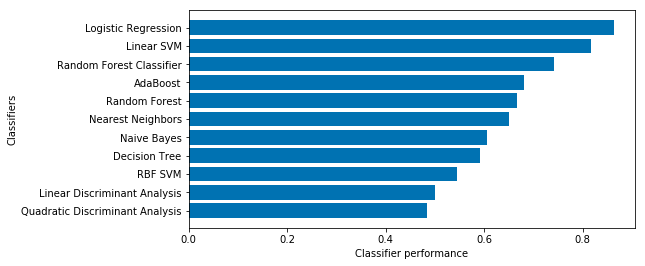

In [1041]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis", "Logistic Regression"
         , "Random Forest Classifier"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators = 40)]

# data process
X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1).isin(['BL', 'V02'])] 
# X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X.columns = [' '.join(col).strip() for col in X.columns.values]
# X.columns = [' '.join(col).strip().replace(' ', ',') for col in X.columns.values]


Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

### 11.1. RFE

In [1053]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1).isin(['BL', 'V02'])] 
X.columns = [' '.join(col).strip() for col in X.columns.values]

Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 73) # the magic number of features 
rfe_fit = rfe.fit(X, Y)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
BL_year1_features = X.columns.get_level_values(0)[rfe_fit.support_]
X.columns.get_level_values(0)[rfe_fit.support_]
# X.columns.get_level_values(0)



Num Features: 73
Selected Features:  [ True False False False  True  True  True False False False False False
 False False False False False  True False False False  True False False
 False False False False False  True False False  True  True  True  True
 False False False  True False  True False False False False  True False
 False  True False False False  True  True  True False  True  True False
 False False  True  True  True False  True False False False  True False
 False  True False  True False  True False  True False  True  True False
 False  True  True  True False False False False False False  True False
 False  True False False False  True False False  True  True False False
 False False False  True False False False False False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False  True  True False  True
  True  True False  True False False False  True False False False False
 False False F

Index(['NP1COG BL', 'NP1DPRS BL', 'NP1DPRS V02', 'NP1ANXS BL', 'NP1PAIN V02',
       'NP1CNST V02', 'NP2SALV V02', 'NP2EAT BL', 'NP2EAT V02', 'NP2DRES BL',
       'NP2DRES V02', 'NP2HWRT V02', 'NP2HOBB V02', 'NP2RISE BL',
       'NP2WALK V02', 'NP3SPCH V02', 'NP3FACXP BL', 'NP3FACXP V02',
       'NP3RIGN V02', 'NP3RIGRU BL', 'PN3RIGRL BL', 'PN3RIGRL V02',
       'NP3RIGLL BL', 'NP3FTAPR BL', 'NP3HMOVR BL', 'NP3HMOVL V02',
       'NP3PRSPR V02', 'NP3PRSPL V02', 'NP3TTAPR V02', 'NP3TTAPL V02',
       'NP3LGAGR BL', 'NP3LGAGL V02', 'NP3RISNG BL', 'NP3RISNG V02',
       'NP3POSTR BL', 'NP3BRADY V02', 'NP3PTRML V02', 'NP3KTRML BL',
       'NP3KTRML V02', 'NP3RTARL V02', 'NHY V02', 'ESS2 BL', 'visuospatial BL',
       'naming BL', 'language BL', 'delayed_recall BL', 'MCAABSTR BL',
       'MCATOT BL', 'CN346RSP BL', 'HVLTRT1 BL', 'HVLTRT2 BL', 'HVLTRT3 BL',
       'HVLTRDLY BL', 'HVLTREC BL', 'HVLTFPRL BL', 'LNS_TOTRAW BL', 'TMSEX BL',
       'TMTORACT BL', 'DRMAGRAC BL', 'DRMAGRAC V02', 'SLP

0.848484848485


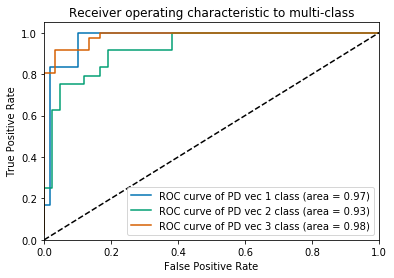

In [1054]:
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_rfe = X.ix[:,X.columns.get_level_values(0)[rfe_fit.support_]]

# X_rfe = X_rfe.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X_rfe
Y_rfe = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(accuracy_score(Y_test, lr.predict(X_test)))

# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = lr.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD vec 1' if i+2==2 else 'PD vec 2' if i+2==3 else 'PD vec 3' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [130]:
BL_features
pd.Series(list(set(BL_features) & set(BL_year1_features)))
BL_year1_features.difference(BL_features)

Index(['DEPRS V02', 'DRMOBJFL V02', 'DRMVERBL V02', 'ESS2 BL', 'MVAWAKEN BL',
       'NP1CNST V02', 'NP1FATG V02', 'NP1PAIN V02', 'NP1SLPN V02',
       'NP2DRES V02', 'NP2EAT V02', 'NP2HOBB V02', 'NP2HWRT V02',
       'NP2RISE V02', 'NP2SALV V02', 'NP3BRADY V02', 'NP3FACXP V02',
       'NP3HMOVL V02', 'NP3KTRML V02', 'NP3LGAGL V02', 'NP3PRSPL V02',
       'NP3RIGN V02', 'NP3RIGRU V02', 'NP3RTALL V02', 'NP3RTARL V02',
       'NP3SPCH V02', 'NP3TTAPL V02', 'PN3RIGRL V02', 'SLPLMBMV V02',
       'a_state V02', 'gastrointestinal_up V02', 'language BL'],
      dtype='object')

### 12. Predicting PD progression from genetic + clinical

In [12]:
cols["mike"] = [ "ID", "upsitTotal", "age", "female", "famHist", "grsExpanded", "NeuroX_dbSNP_rs114138760_C", "exm106217_C", "exm106220_A", "NeuroX_rs2230288_A", "NeuroX_rs823118_C", "NeuroX_rs10797576_T", "NeuroX_rs6430538_T", "NeuroX_rs1955337_T", "NeuroX_rs12637471_A", "NeuroX_dbSNP_rs34884217_replciate_1_G", "NeuroX_rs34311866_G", "NeuroX_rs11724635_C", "exm.rs6812193_T", "NeuroX_rs356181_C", "NeuroX_rs3910105_C", "exm535099_T", "NeuroX_dbSNP_rs115462410_T", "NeuroX_rs199347_C", "NeuroX_rs591323_A", "NeuroX_dbSNP_rs118117788_T", "NeuroX_rs329648_T", "NeuroX_rs76904798_T", "exm994671_A", "NeuroX_rs11060180_G", "NeuroX_rs11158026_T", "NeuroX_rs2414739_G", "NeuroX_dbSNP_rs14235_replciate_1_A", "exm.rs11868035_A", "NeuroX_rs17649553_T", "NeuroX_rs12456492_G", "NeuroX_rs55785911_A" ]
mike = pd.read_csv("../data/genetic/ppmiWithExpandedGrs.tab", delimiter='\t', index_col=["ID"], usecols=cols["mike"])
mike_PD = mike[mike.index.isin(M_label_PD.index)]

# mike_PD[mike_PD.isnull().any(axis=1)]
mike_PD#.groupby('case').size()
# data_visits["info"].GENDER[data_visits["info"].GENDER.index.isin(M_label_PD.index)]
# mike_PD.female
mike_PD.columns

Index(['upsitTotal', 'age', 'female', 'famHist', 'grsExpanded',
       'NeuroX_dbSNP_rs114138760_C', 'exm106217_C', 'exm106220_A',
       'NeuroX_rs2230288_A', 'NeuroX_rs823118_C', 'NeuroX_rs10797576_T',
       'NeuroX_rs6430538_T', 'NeuroX_rs1955337_T', 'NeuroX_rs12637471_A',
       'NeuroX_dbSNP_rs34884217_replciate_1_G', 'NeuroX_rs34311866_G',
       'NeuroX_rs11724635_C', 'exm.rs6812193_T', 'NeuroX_rs356181_C',
       'NeuroX_rs3910105_C', 'exm535099_T', 'NeuroX_dbSNP_rs115462410_T',
       'NeuroX_rs199347_C', 'NeuroX_rs591323_A', 'NeuroX_dbSNP_rs118117788_T',
       'NeuroX_rs329648_T', 'NeuroX_rs76904798_T', 'exm994671_A',
       'NeuroX_rs11060180_G', 'NeuroX_rs11158026_T', 'NeuroX_rs2414739_G',
       'NeuroX_dbSNP_rs14235_replciate_1_A', 'exm.rs11868035_A',
       'NeuroX_rs17649553_T', 'NeuroX_rs12456492_G', 'NeuroX_rs55785911_A'],
      dtype='object')

In [29]:
data_visits["info"].GENDER[data_visits["info"].GENDER.index.isin(M_label_PD.index)]

X_clinical = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 

X_genetic = mike_PD[mike_PD.index.isin(M_label_PD.index)].dropna(axis=0).drop(["upsitTotal", "age", "female", "famHist", "grsExpanded"],1)
Y_genetic = M_label_PD[M_label_PD.index.isin(X_genetic.index)].GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])


X_genetic_clinical = pd.concat([X_genetic, X_clinical], axis=1, join='inner')
X_genetic_clinical.shape

(285, 171)

/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


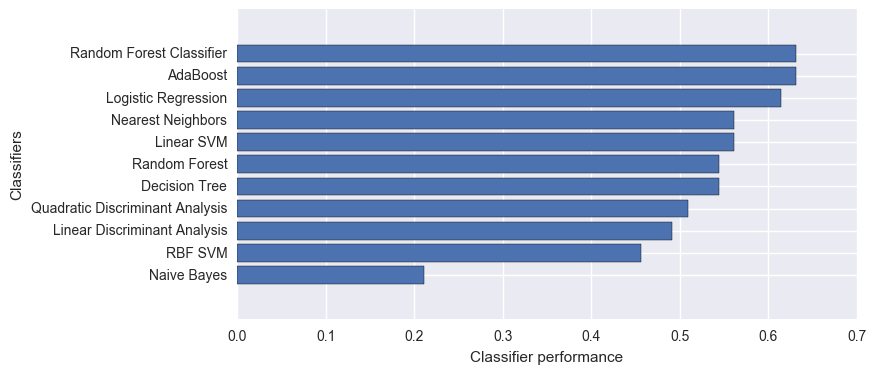

In [30]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis", "Logistic Regression"
         , "Random Forest Classifier"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators = 40)]

X_train, X_test, Y_train, Y_test = train_test_split(X_genetic_clinical, Y_genetic, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

### RFE genetic + clinical

In [31]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = pd.read_csv(url, names=names)
# array = dataframe.values
# X = array[:,0:8]
# Y = array[:,8]

# X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 52) # the magic number of features 
rfe_fit = rfe.fit(X_genetic_clinical, Y_genetic)
print("Num Features:", rfe_fit.n_features_)
print("Selected Features: ", rfe_fit.support_)
print("Feature Ranking: ", rfe_fit.ranking_)
X_genetic_clinical.columns.get_level_values(0)[rfe_fit.support_]



Num Features: 52
Selected Features:  [False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False  True  True False  True False False False False False  True
  True  True  True False  True False  True False False  True  True  True
  True False False  True  True  True False  True  True  True False False
  True  True  True False False False  True False False False False  True
 False False False False False False False False  True False False False
 False  True False False False False  True False False  True  True False
  True False False False False False False False False False False False
  True False  True  True  True False False  True False False  True False
 False False  True False False False False False  True False  True False
  True False  True  True False False  True  True False False False  True
 False False  

Index([                  'exm106220_A',               ('NP1ANXS', 'BL'),
                     ('NP1SLPD', 'BL'),               ('NP1PAIN', 'BL'),
                     ('NP1CNST', 'BL'),                ('NP2EAT', 'BL'),
                     ('NP2DRES', 'BL'),               ('NP2HYGN', 'BL'),
                     ('NP2HWRT', 'BL'),               ('NP2TURN', 'BL'),
                     ('NP2RISE', 'BL'),               ('NP3SPCH', 'BL'),
                    ('NP3FACXP', 'BL'),               ('NP3RIGN', 'BL'),
                    ('NP3RIGRU', 'BL'),              ('NP3RIGLL', 'BL'),
                    ('NP3FTAPR', 'BL'),              ('NP3FTAPL', 'BL'),
                    ('NP3HMOVL', 'BL'),              ('NP3PRSPR', 'BL'),
                    ('NP3PRSPL', 'BL'),              ('NP3LGAGR', 'BL'),
                    ('NP3LGAGL', 'BL'),              ('NP3RISNG', 'BL'),
                    ('NP3POSTR', 'BL'),              ('NP3KTRML', 'BL'),
                         ('NHY', 'BL'),            

In [23]:
X_rfe.stack

<bound method DataFrame.stack of       exm106220_A  (NP1ANXS, BL)  (NP1SLPD, BL)  (NP1PAIN, BL)  (NP1CNST, BL)  \
3001            0           0.00           0.50           0.00           0.00   
3002            0           0.00           0.25           0.00           0.25   
3012            0           0.25           0.00           0.25           0.25   
3014            0           0.00           0.25           0.50           0.00   
3018            0           0.25           0.50           0.25           0.00   
3020            0           0.00           0.50           0.50           0.25   
3021            0           0.00           0.50           0.25           0.00   
3023            0           0.25           0.50           0.25           0.00   
3028            0           0.00           0.50           0.00           0.00   
3051            0           0.00           0.25           0.00           0.00   
3052            0           0.25           0.50           0.25           0.2

0.649122807018


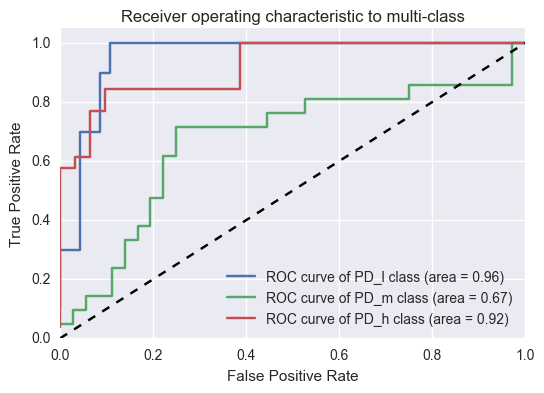

In [32]:
from sklearn.cross_validation import train_test_split
# from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_rfe = X_genetic_clinical.ix[:,X_genetic_clinical.columns.get_level_values(0)[rfe_fit.support_]]
X_rfe = X_rfe#.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X_rfe
Y_rfe = Y_genetic

X_train, X_test, Y_train, Y_test = train_test_split(X_rfe, Y_rfe, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print(accuracy_score(Y_test, lr.predict(X_test)))

# plot ROC
# ref: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
from sklearn import metrics 
n_classes = len(Y_test.unique())
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    preds = lr.predict_proba(X_test)[:,i]
    label = [1 if int(j) == (i+2) else 0 for j in Y_test] #2,3,4
    fpr[i], tpr[i], _ = metrics.roc_curve(label, preds)
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
    class_name = 'PD_l' if i+2==2 else 'PD_m' if i+2==3 else 'PD_h' if i+2==4 else 'SWEDD' if i+2==5 else 'NA'
    plt.plot(fpr[i], tpr[i], label='ROC curve of {0} class (area = {1:0.2f})'
                                   ''.format(class_name, roc_auc[i]))

# Compute micro-average ROC curve and ROC area
# y_score = lr.predict(X_test)
# fpr["micro"], tpr["micro"], _ = metrics.roc_curve(Y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(1, figsize=(8, 4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## Using xgboost

In [74]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, Y_train, Y_test = train_test_split(X_genetic, Y_genetic, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(max_depth=3, n_estimators=200, learning_rate=0.01)
model.fit(X_train, Y_train)

# make predictions for test data
Y_pred = model.predict(X_test)
accuracy_score(Y_test, Y_pred)

# learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]


# n_runs = 50
# for i in range(n_runs):
#     print('test run: %d' % i)
#     clf = xgb.XGBClassifier(n_estimators = 200, seed = 42, learning_rate= 0.5, max_depth=15,min_child_weight=1,gamma=1,subsample=0.9,colsample_bytree=0.9)
#     clf.fit(train_data,label)

#     temp_preds = clf.predict(test_data)
#     if i == 0:
#         tot_preds = temp_preds
#     else:
#         tot_preds += temp_preds

# preds = np.expm1(tot_preds/n_runs)

# for i in range(preds.shape[0]):
#     if preds[i] < 0:
#         preds[i] = 0

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# from matplotlib import pyplot
# import numpy

# # grid search
# model = xgb.XGBClassifier()
# n_estimators = [100, 200, 300, 400, 500]
# learning_rate = [0.0001, 0.001, 0.01, 0.1]
# param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
# grid_result = grid_search.fit(X_genetic, Y_genetic)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))
# # plot results
# scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
# for i, value in enumerate(learning_rate):
#     pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
# pyplot.legend()
# pyplot.xlabel('n_estimators')
# pyplot.ylabel('Log Loss')

0.45614035087719296

### 11. Predicting PD progression from genetic

In [94]:
cols["mike"] = [ "ID", "upsitTotal", "age", "female", "famHist", "grsExpanded", "NeuroX_dbSNP_rs114138760_C", "exm106217_C", "exm106220_A", "NeuroX_rs2230288_A", "NeuroX_rs823118_C", "NeuroX_rs10797576_T", "NeuroX_rs6430538_T", "NeuroX_rs1955337_T", "NeuroX_rs12637471_A", "NeuroX_dbSNP_rs34884217_replciate_1_G", "NeuroX_rs34311866_G", "NeuroX_rs11724635_C", "exm.rs6812193_T", "NeuroX_rs356181_C", "NeuroX_rs3910105_C", "exm535099_T", "NeuroX_dbSNP_rs115462410_T", "NeuroX_rs199347_C", "NeuroX_rs591323_A", "NeuroX_dbSNP_rs118117788_T", "NeuroX_rs329648_T", "NeuroX_rs76904798_T", "exm994671_A", "NeuroX_rs11060180_G", "NeuroX_rs11158026_T", "NeuroX_rs2414739_G", "NeuroX_dbSNP_rs14235_replciate_1_A", "exm.rs11868035_A", "NeuroX_rs17649553_T", "NeuroX_rs12456492_G", "NeuroX_rs55785911_A" ]
mike = pd.read_csv("../data/genetic/ppmiWithExpandedGrs.tab", delimiter='\t', index_col=["ID"], usecols=cols["mike"])
mike_PD = mike[mike.index.isin(M_label_PD.index)]

# mike_PD[mike_PD.isnull().any(axis=1)]
mike_PD#.groupby('case').size()
# data_visits["info"].GENDER[data_visits["info"].GENDER.index.isin(M_label_PD.index)]
# mike_PD.female
mike_PD.columns

Index(['upsitTotal', 'age', 'female', 'famHist', 'grsExpanded',
       'NeuroX_dbSNP_rs114138760_C', 'exm106217_C', 'exm106220_A',
       'NeuroX_rs2230288_A', 'NeuroX_rs823118_C', 'NeuroX_rs10797576_T',
       'NeuroX_rs6430538_T', 'NeuroX_rs1955337_T', 'NeuroX_rs12637471_A',
       'NeuroX_dbSNP_rs34884217_replciate_1_G', 'NeuroX_rs34311866_G',
       'NeuroX_rs11724635_C', 'exm.rs6812193_T', 'NeuroX_rs356181_C',
       'NeuroX_rs3910105_C', 'exm535099_T', 'NeuroX_dbSNP_rs115462410_T',
       'NeuroX_rs199347_C', 'NeuroX_rs591323_A', 'NeuroX_dbSNP_rs118117788_T',
       'NeuroX_rs329648_T', 'NeuroX_rs76904798_T', 'exm994671_A',
       'NeuroX_rs11060180_G', 'NeuroX_rs11158026_T', 'NeuroX_rs2414739_G',
       'NeuroX_dbSNP_rs14235_replciate_1_A', 'exm.rs11868035_A',
       'NeuroX_rs17649553_T', 'NeuroX_rs12456492_G', 'NeuroX_rs55785911_A'],
      dtype='object')

In [168]:
data_visits["info"].GENDER[data_visits["info"].GENDER.index.isin(M_label_PD.index)]


X_temp_gen = mike_PD[mike_PD.index.isin(M_label_PD.index)].dropna(axis=0)#.drop(["upsitTotal", "age", "female", "famHist", "grsExpanded"],1)

Y_temp_gen = M_label_PD[M_label_PD.index.isin(X_temp_gen.index)]

X_temp_gen.shape

(285, 36)

/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/faraz/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


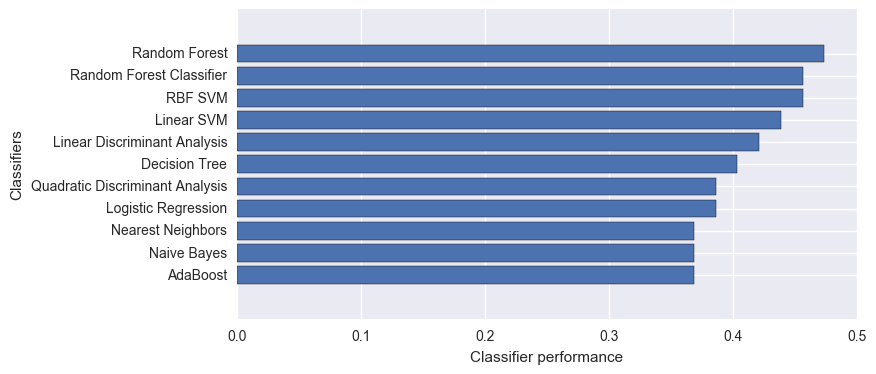

In [148]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis", "Logistic Regression"
         , "Random Forest Classifier"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    RandomForestClassifier(n_estimators = 40)]

# data process
# X = M_chosen.ix[M_label_PD.index, M_chosen.columns.get_level_values(1)=='BL'] 
# X = X.stack().reset_index().set_index('PATNO').drop('EVENT_ID',1)
X = X_temp_gen
# Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])
Y = Y_temp_gen.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scores = []

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
#     print(name)
#     print(score)
    scores.append(score)

# plot
%matplotlib inline
# figure = plt.figure(figsize=(27, 9))
plt.figure(1, figsize=(8, 4))
imp, names = zip(*sorted(zip(scores, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Classifier performance')
plt.ylabel('Classifiers')
#plt.title('Comparision of different classifiers')
plt.show()

# Test: random forest for genetic

In [51]:
# ref: http://bigdataexaminer.com/data-science/dealing-with-unbalanced-classes-svm-random-forests-and-decision-trees-in-python/
import scipy as sp
import sklearn
import seaborn as sns 
import sklearn.cross_validation

# X = X_temp_gen#M_PD_HC_SWEDD_gmm_chosen#.as_matrix()
# Y = Y_temp_gen.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])#.as_matrix()

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

scores = []

for val in range(1,50):
    clf = RandomForestClassifier(n_estimators = val, n_jobs=2)
    validated = cross_val_score(clf , X_genetic_clinical, Y_genetic_clinical, cv = 10)
    scores.append(validated)

# plot
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification scores')
plt.title('Classification score for number of trees')
plt.show()



ValueError: multiclass-multioutput is not supported

# Test: feature selection/Using randomized decision trees (a.k.a. extra-trees)

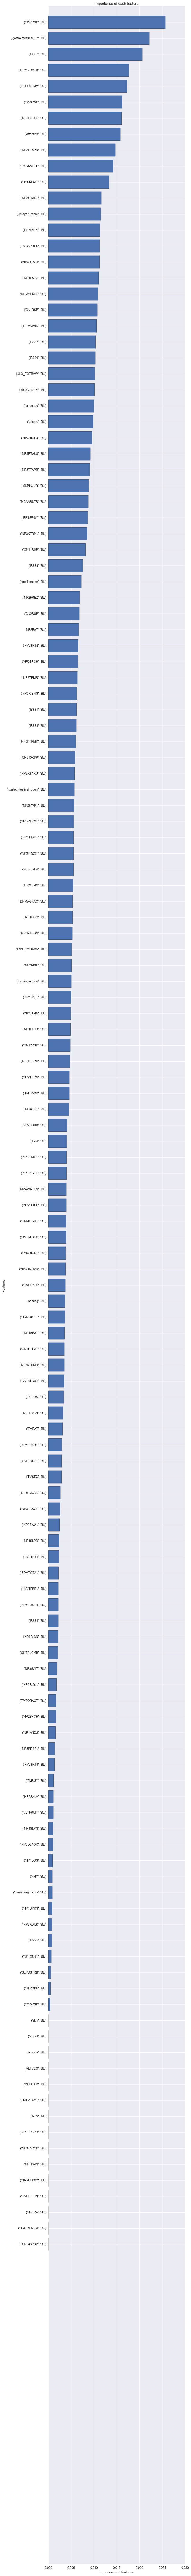

In [52]:
# find important features using L1 to 60
from sklearn.feature_selection import SelectFromModel
func = lr.fit(X_train, Y_train)
model = SelectFromModel(func, prefit=True)
X_new = model.transform(X_train)

# find important features
# ref: http://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)

imp = model.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

%matplotlib inline
plt.figure(1, figsize=(8, 150))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()



# Test: features/ Using random forest

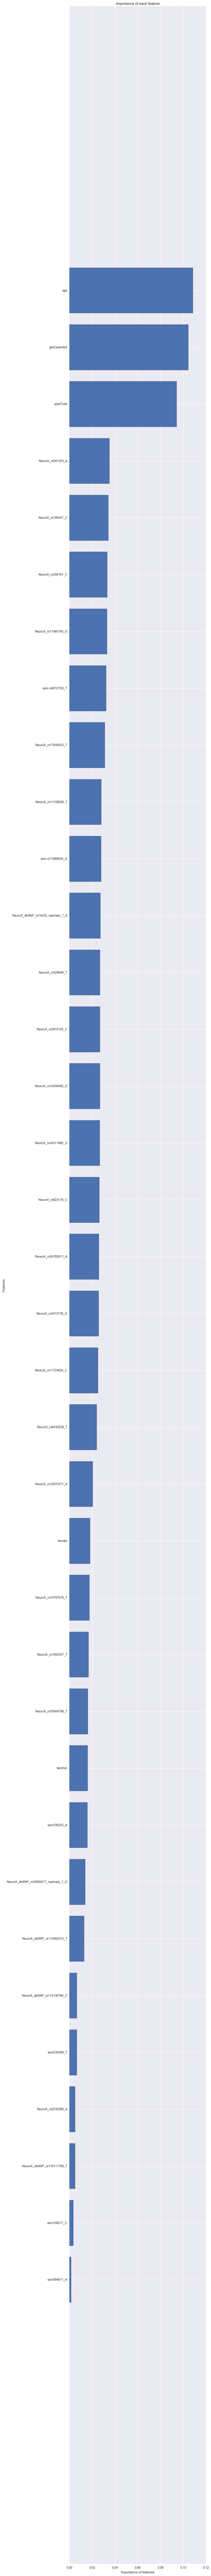

In [53]:
# check predection at baseline
plt.figure(1, figsize=(8, 150))
X = X_temp_gen
# Y = M_label_PD.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])
Y = Y_temp_gen.GMM.replace(['HC', 'PD_l', 'PD_m', 'PD_h', 'SWEDD'], ['1', '2', '3', '4', '5'])
clf = RandomForestClassifier(n_estimators=40)
clf.fit(X,Y)

imp = clf.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()



